In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt


In [8]:
import os

cbb = pd.read_csv("march.csv", encoding='utf-8')
print(cbb.shape[1])
cbb.head(1000)

28


YEAR               TEAM  CONF     G  WINS  LOSSES     W%  ADJOE  ADJDE  \
0    2008             Kansas   B12  33.0  30.0     3.0  0.909  121.0   85.6   
1    2008     North Carolina   ACC  34.0  32.0     2.0  0.941  120.2   91.8   
2    2008              Texas   B12  33.0  27.0     6.0  0.818  120.0   94.2   
3    2008              Drake   MVC  30.0  26.0     4.0  0.867  118.0   96.3   
4    2008             Oregon   P10  31.0  18.0    13.0  0.581  117.8  101.2   
..    ...                ...   ...   ...   ...     ...    ...    ...    ...   
955  2023                VCU   A10  34.0  27.0     7.0  0.794  104.2   93.1   
956  2023        Montana St.  BSky  32.0  23.0     9.0  0.719  104.1   97.0   
957  2023      UNC Asheville  BSth  32.0  25.0     7.0  0.781  101.2  102.4   
958  2023  Northern Kentucky  Horz  32.0  20.0    12.0  0.625  101.1  101.1   
959  2023             Howard  MEAC  31.0  19.0    12.0  0.613  100.9  105.7   

     EFG%  ...  2P%D   3P%  3P%D   3PR  3PRD  ADJ T.   WAB  SEED       FINISH  \
0    56.3  ...  40.9  39.9  34.0  29.2  38.1    69.5   9.9   1.0       CHAMPS   
1    52.4  ...  47.0  37.8  33.2  22.2  34.8    75.1  11.9   1.0   Final Four   
2    51.4  ...  43.6  37.7  33.2  34.3  38.9    64.8   8.4   2.0  Elite Eight   
3    52.8  ...  49.2  36.6  33.8  45.5  39.3    64.2   5.2   5.0          R64   
4    56.3  ...  50.1  40.1  33.6  39.0  35.3    67.9   0.8   9.0          R64   
..    ...  ...   ...   ...   ...   ...   ...     ...   ...   ...          ...   
955  52.2  ...  46.2  34.7  32.3  32.8  34.1    68.8   1.0  12.0          R64   
956  50.9  ...  48.0  32.0  34.8  33.3  34.2    67.1  -2.7  14.0          R64   
957  53.9  ...  49.1  38.8  30.5  37.2  34.0    69.1  -1.9  15.0          R64   
958  49.8  ...  48.9  35.2  36.7  40.7  38.9    62.6  -6.7  16.0          R64   
959  52.0  ...  50.8  37.2  33.6  36.1  37.1    69.7  -7.3  16.0          R64   

     T_WINS  
0       6.0  
1       4.0  
2       3.0  
3       0.0  
4       0.0  
..      ...  
955     0.0  
956     0.0  
957     0.0  
958     0.0  
959     0.0  

[960 rows x 28 columns]

In [9]:
finish_counts = cbb['FINISH'].value_counts()
finish_table = pd.DataFrame({'Finish': finish_counts.index, 'Count': finish_counts.values})
#find how many teams make it to each round

print(finish_table)

          Finish  Count
0            R64    480
1            R32    240
2  Sweet Sixteen    120
3    Elite Eight     60
4     Final Four     30
5         CHAMPS     15
6         Finals     15


/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/665717936.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CONF', data=cbb, palette='viridis')


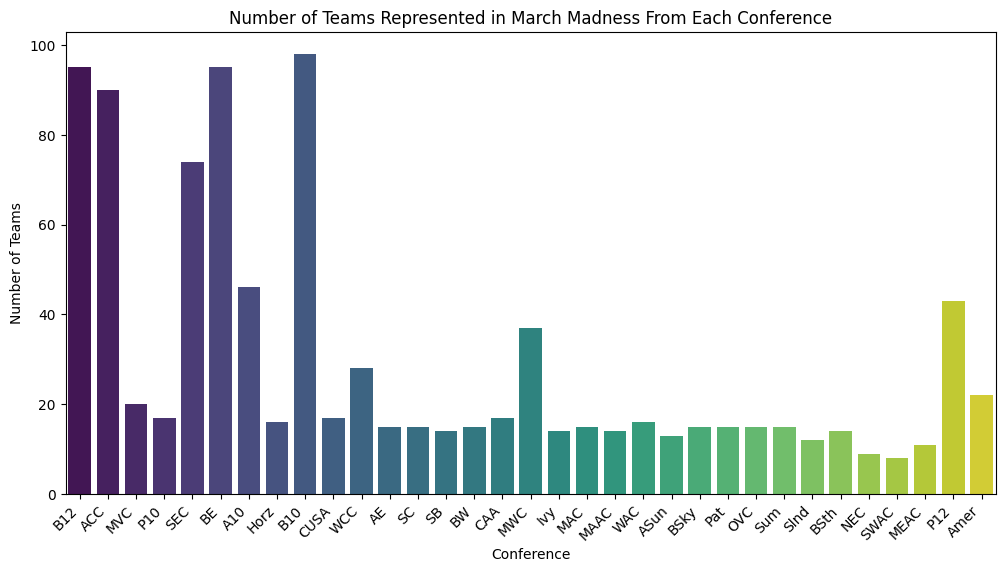

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='CONF', data=cbb, palette='viridis')
#Show how many teams are represented from each conference in March Madness in our data set
plt.title('Number of Teams Represented in March Madness From Each Conference')
plt.xlabel('Conference')
plt.ylabel('Number of Teams')

plt.xticks(rotation=45, ha='right')

plt.show()

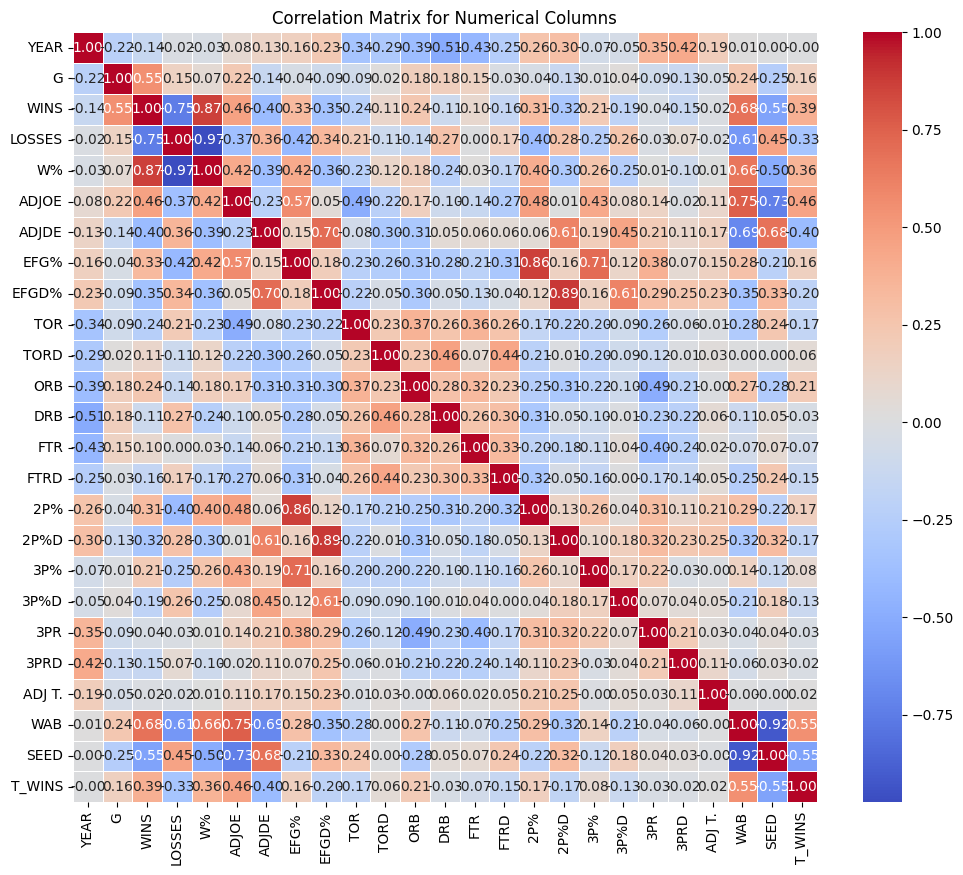

In [11]:
numerical_columns = cbb.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = cbb[numerical_columns].corr()
##Find correlations (Where should we look for metrics to use?)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

In [12]:
data = pd.read_csv('march.csv')
##Add column to simplify to those who lost in the first round and those who did not

data['Is_32'] = data['FINISH'].apply(lambda x: 1 if x != 'R64' else 0)
data.head()

YEAR            TEAM CONF     G  WINS  LOSSES     W%  ADJOE  ADJDE  EFG%  \
0  2008          Kansas  B12  33.0  30.0     3.0  0.909  121.0   85.6  56.3   
1  2008  North Carolina  ACC  34.0  32.0     2.0  0.941  120.2   91.8  52.4   
2  2008           Texas  B12  33.0  27.0     6.0  0.818  120.0   94.2  51.4   
3  2008           Drake  MVC  30.0  26.0     4.0  0.867  118.0   96.3  52.8   
4  2008          Oregon  P10  31.0  18.0    13.0  0.581  117.8  101.2  56.3   

   ...   3P%  3P%D   3PR  3PRD  ADJ T.   WAB  SEED       FINISH  T_WINS  Is_32  
0  ...  39.9  34.0  29.2  38.1    69.5   9.9   1.0       CHAMPS     6.0      1  
1  ...  37.8  33.2  22.2  34.8    75.1  11.9   1.0   Final Four     4.0      1  
2  ...  37.7  33.2  34.3  38.9    64.8   8.4   2.0  Elite Eight     3.0      1  
3  ...  36.6  33.8  45.5  39.3    64.2   5.2   5.0          R64     0.0      0  
4  ...  40.1  33.6  39.0  35.3    67.9   0.8   9.0          R64     0.0      0  

[5 rows x 29 columns]

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3635174661.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Column', y='Correlation', data=correlation_df, palette='coolwarm')


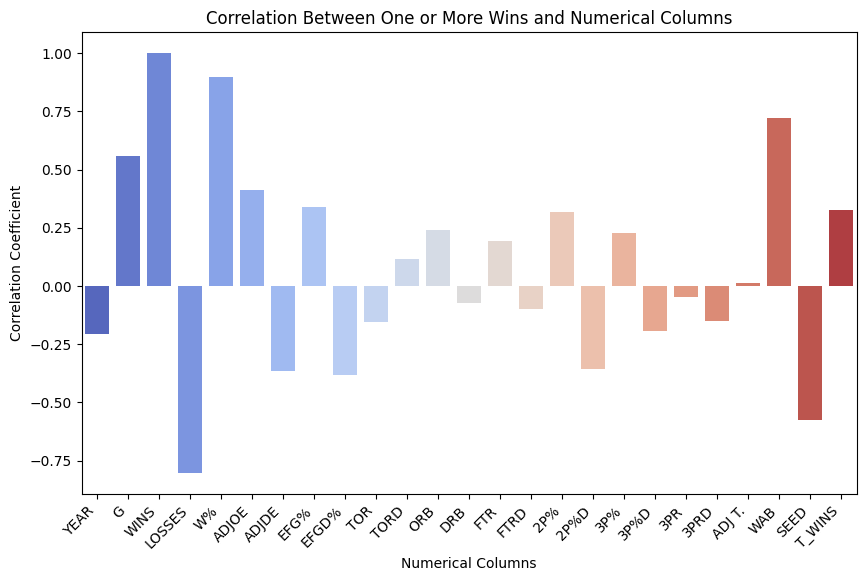

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3635174661.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Column', y='Correlation', data=correlation_df, palette='coolwarm')


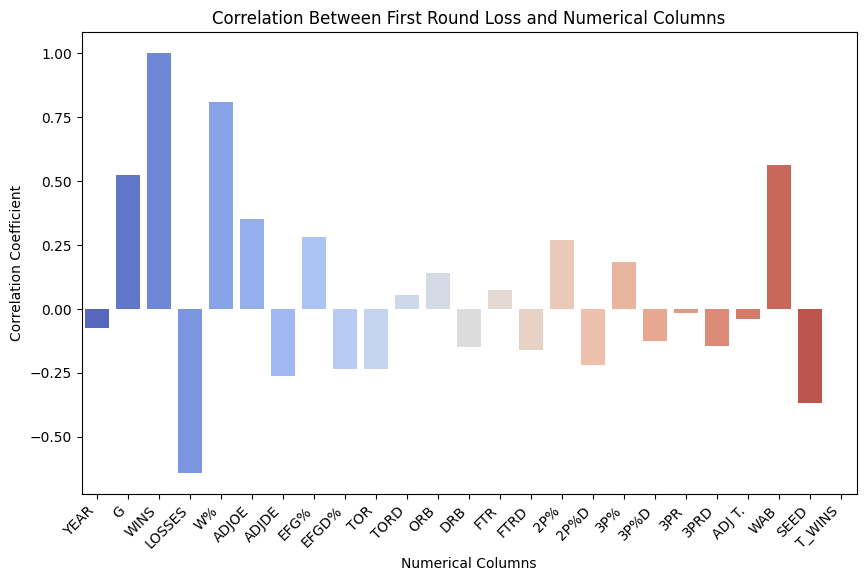

In [13]:
def plot_correlation_bar_chart(df, title):
    plt.figure(figsize=(10, 6))
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    numerical_columns = numerical_columns[numerical_columns != 'Is_32']
    correlation_coeffs = [df[col].corr(df['WINS']) for col in numerical_columns]
    correlation_df = pd.DataFrame({'Column': numerical_columns, 'Correlation': correlation_coeffs})

    sns.barplot(x='Column', y='Correlation', data=correlation_df, palette='coolwarm')
    plt.title(title)
    plt.xlabel('Numerical Columns')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation=45, ha='right')
    plt.show()

plot_correlation_bar_chart(data[data['Is_32'] == 1], 'Correlation Between One or More Wins and Numerical Columns')
##shows how to win
plot_correlation_bar_chart(data[data['Is_32'] == 0], 'Correlation Between First Round Loss and Numerical Columns')
##shows how to lose
##Find the correlations between all of these metrics and Winning in the first round vs the correlations between metrics and losing in the first round

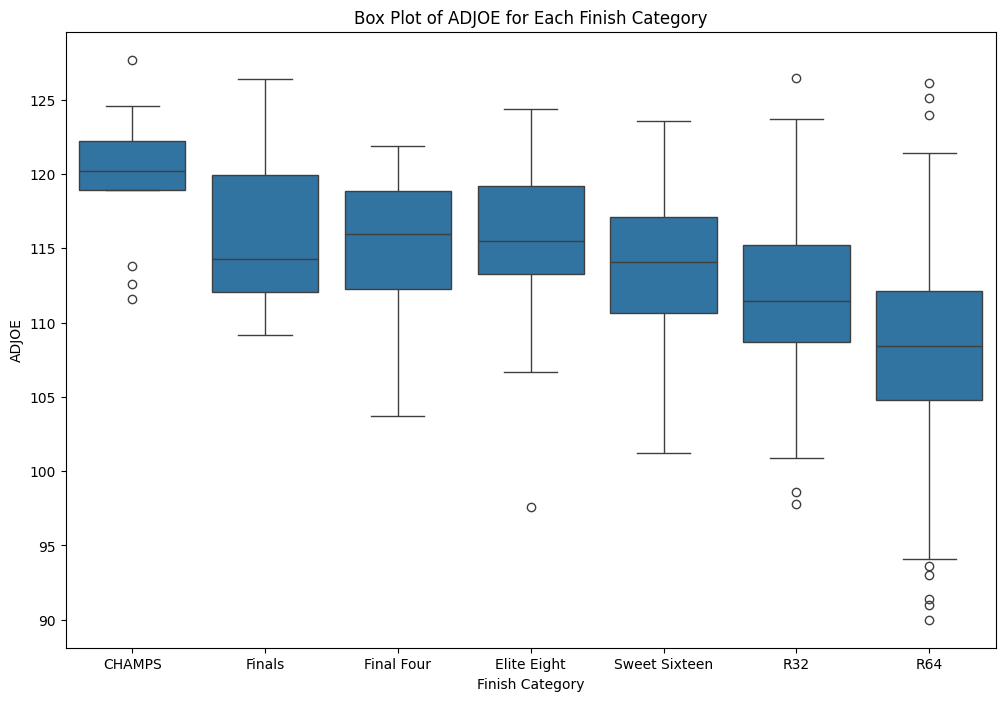

In [14]:
finish_categories = ['CHAMPS', 'Finals', 'Final Four', 'Elite Eight', 'Sweet Sixteen', 'R32', 'R64']

# box plot ADJOE for each finish category
plt.figure(figsize=(12, 8))

sns.boxplot(x='FINISH', y='ADJOE', data=cbb, order=finish_categories)

######################
#Find boxplot for ADJOE based upon where a team finishes in March Madness
plt.title('Box Plot of ADJOE for Each Finish Category')
plt.xlabel('Finish Category')
plt.ylabel('ADJOE')
plt.show()

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


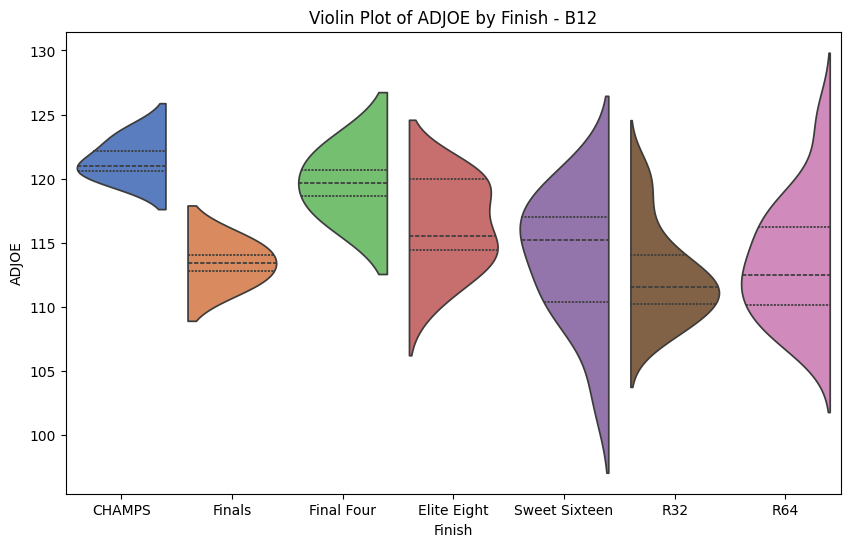

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


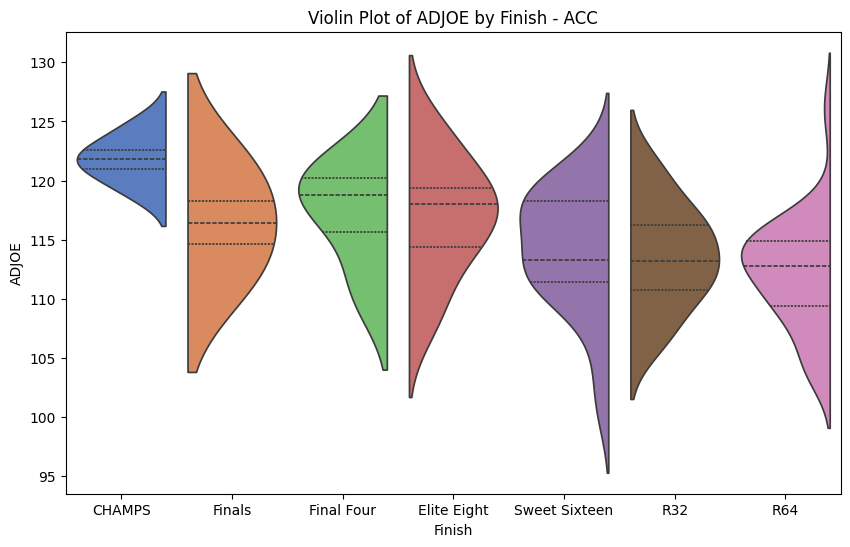

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


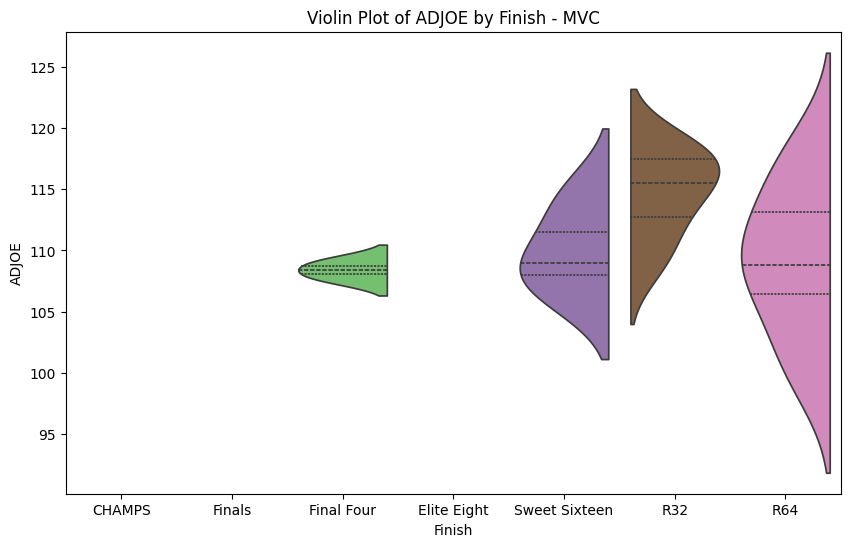

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


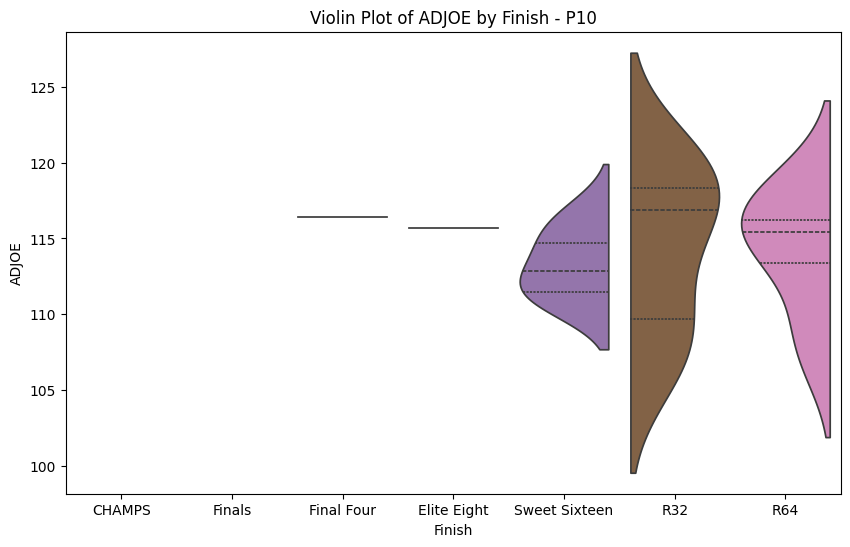

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


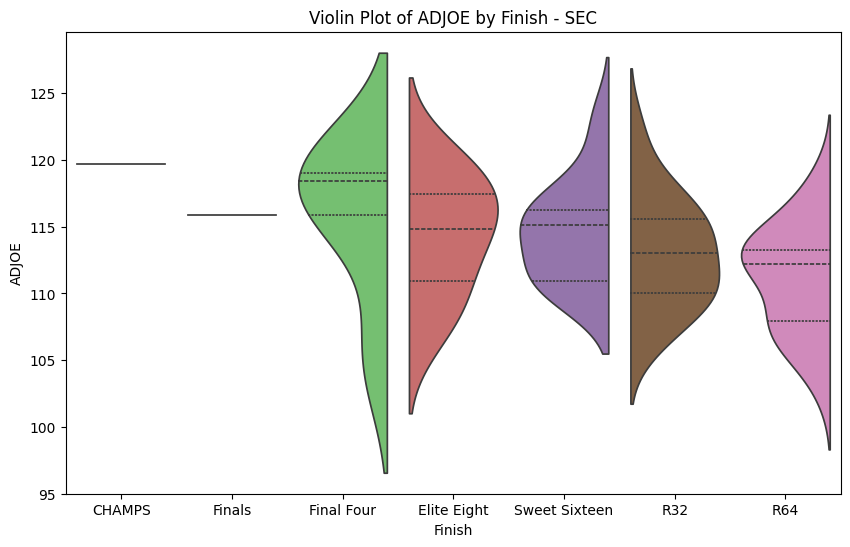

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


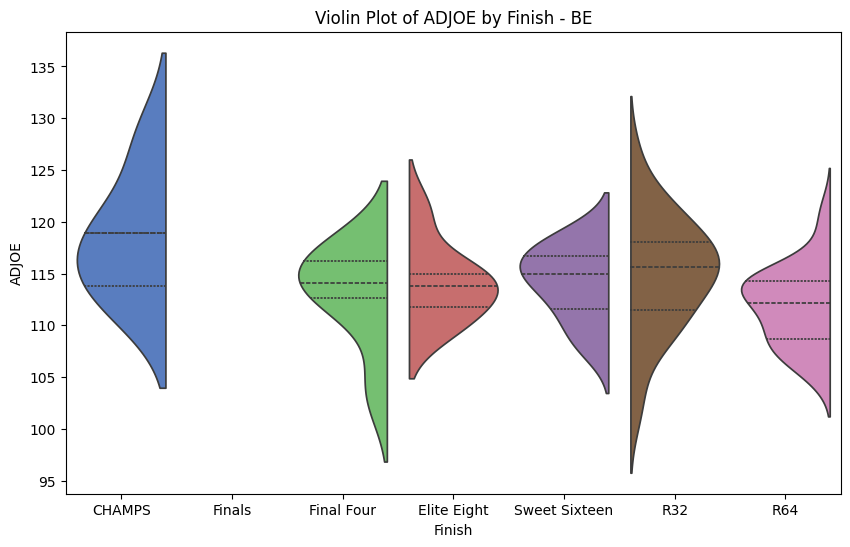

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


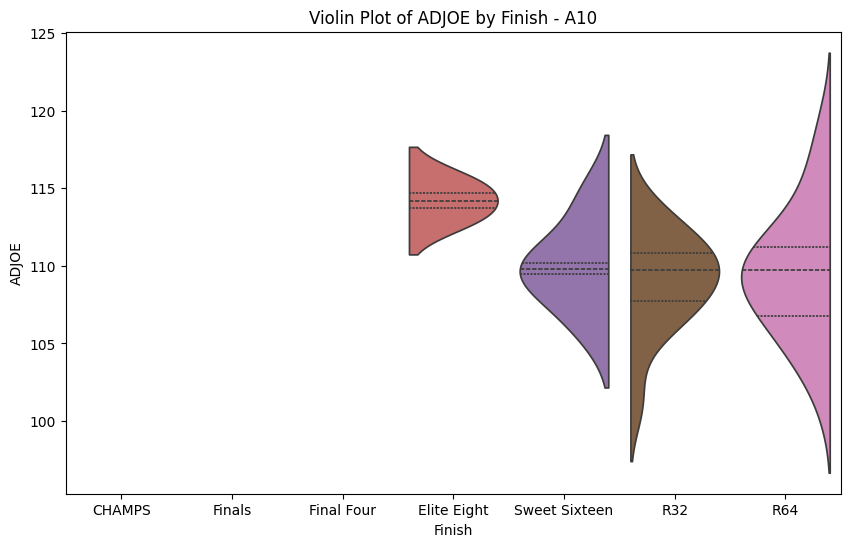

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


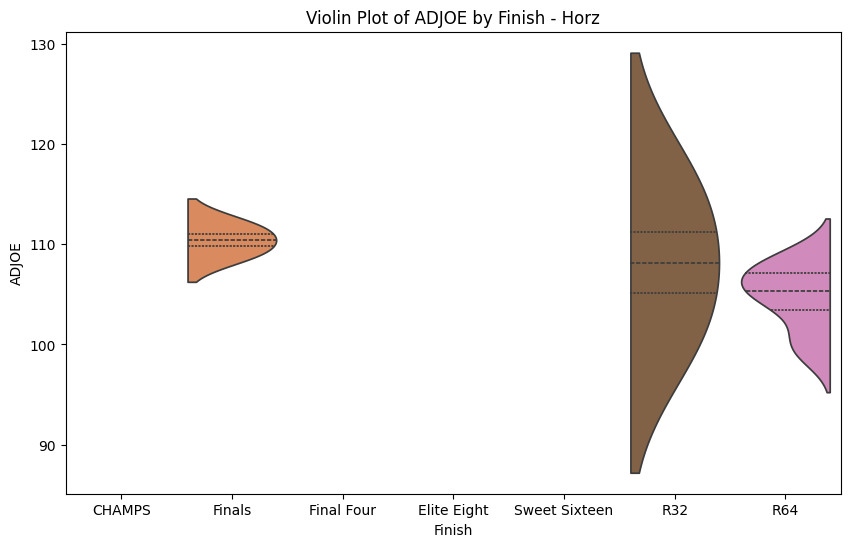

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


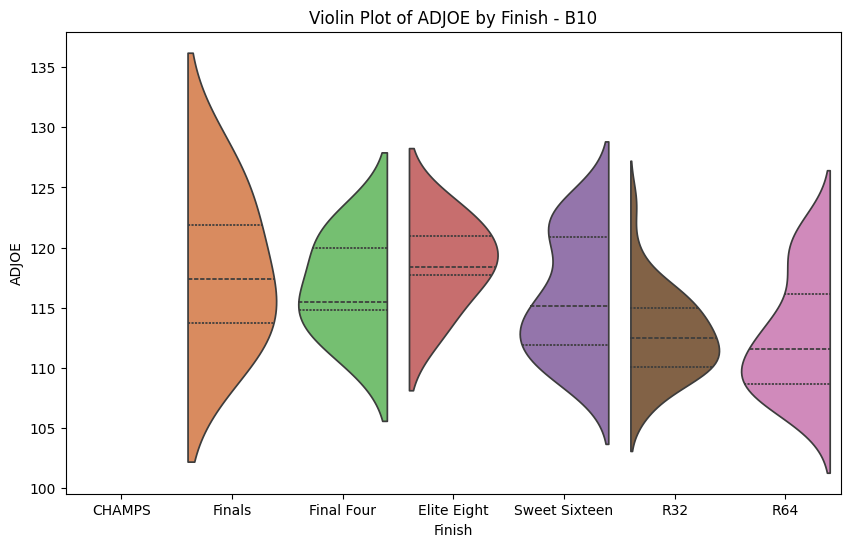

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


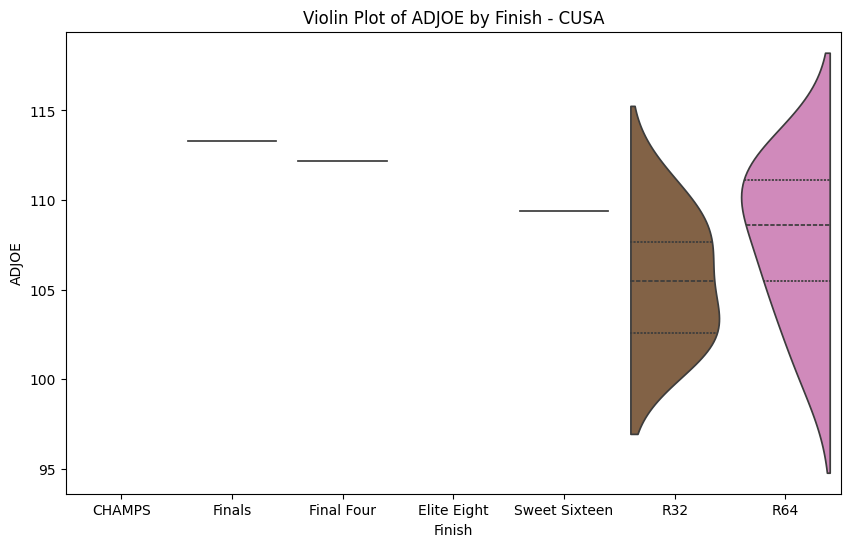

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


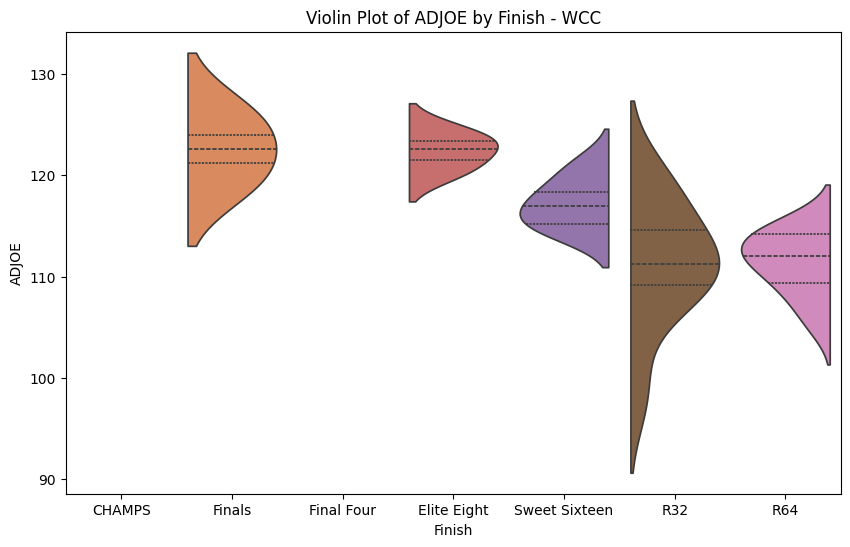

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


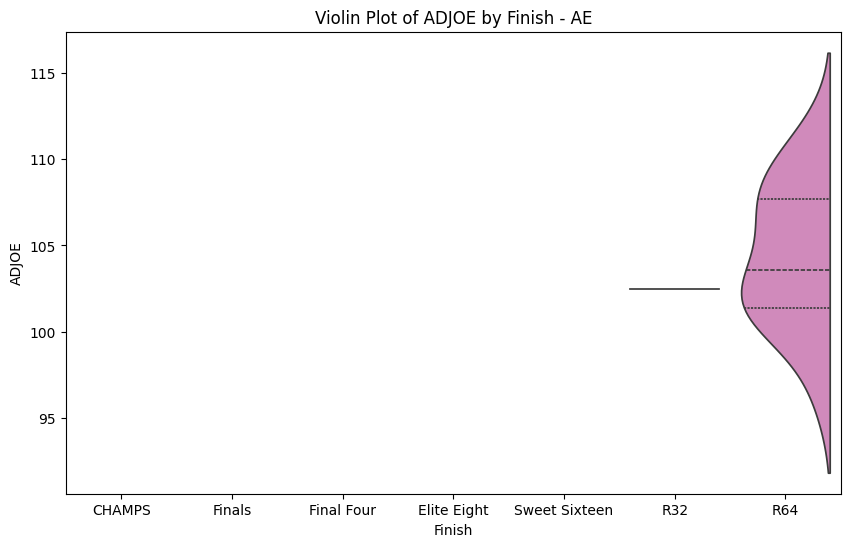

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


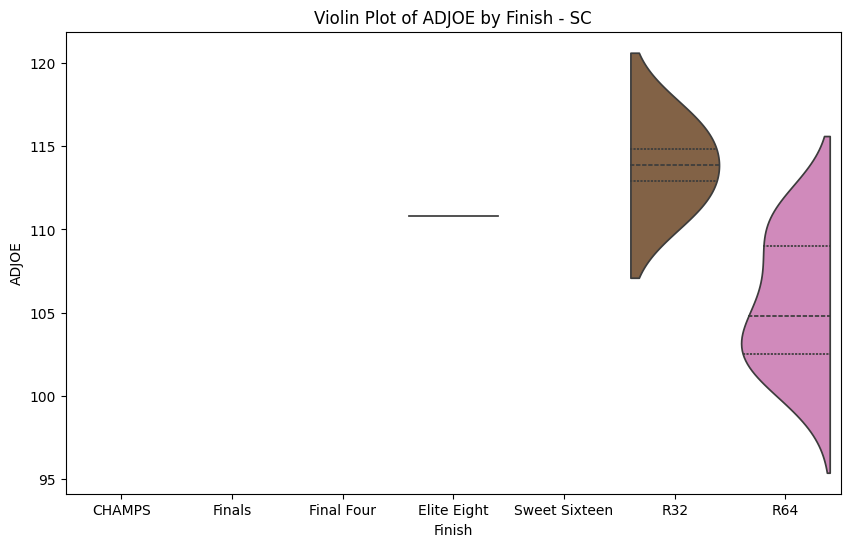

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


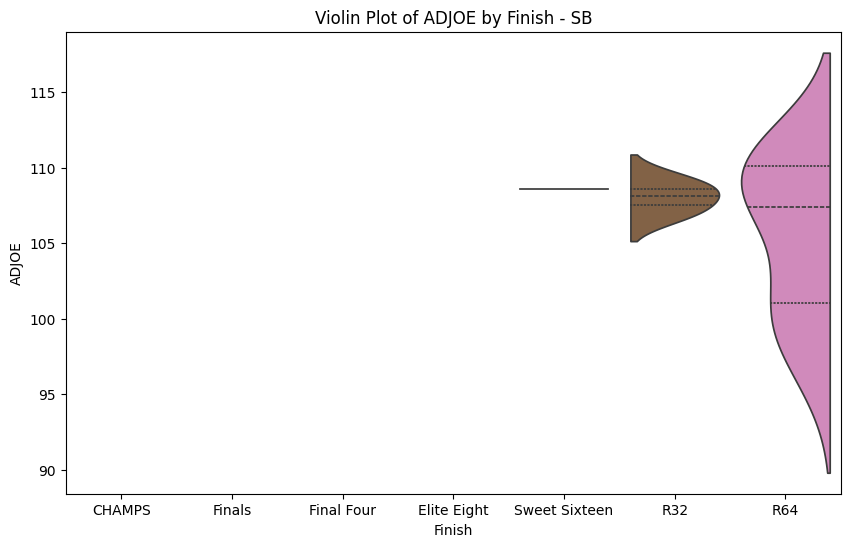

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


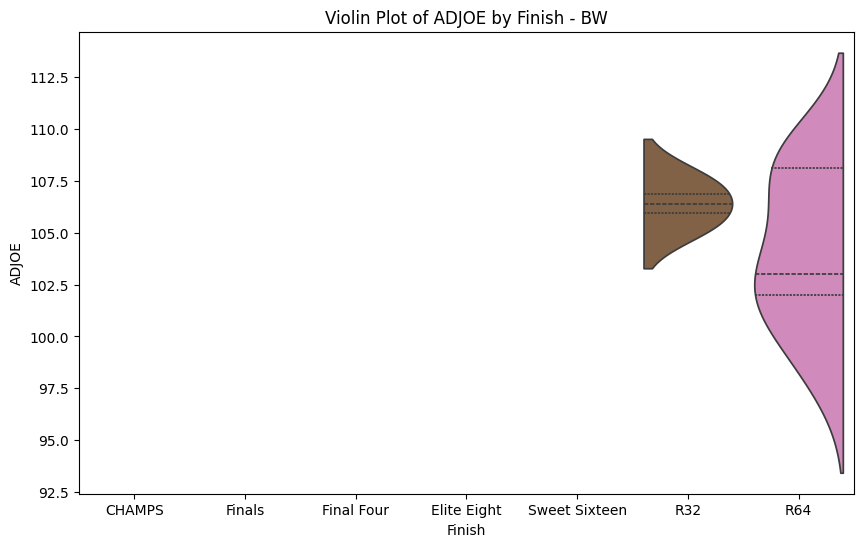

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


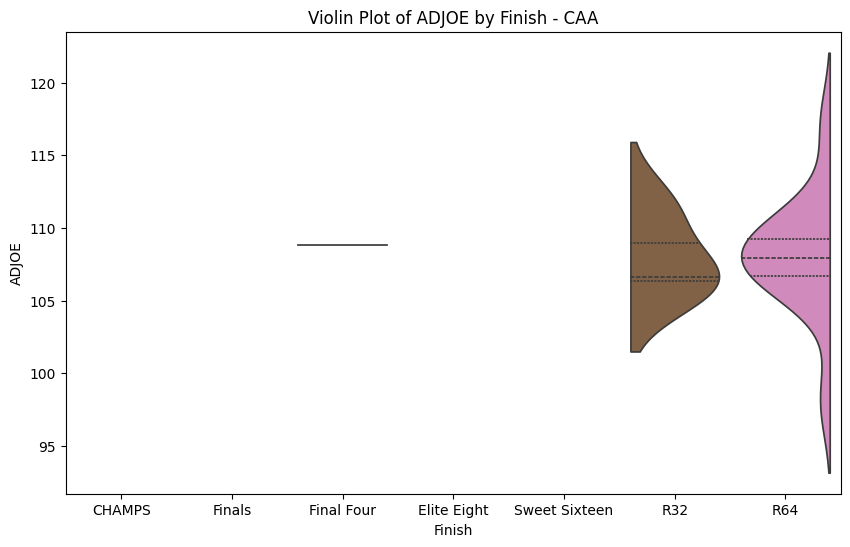

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


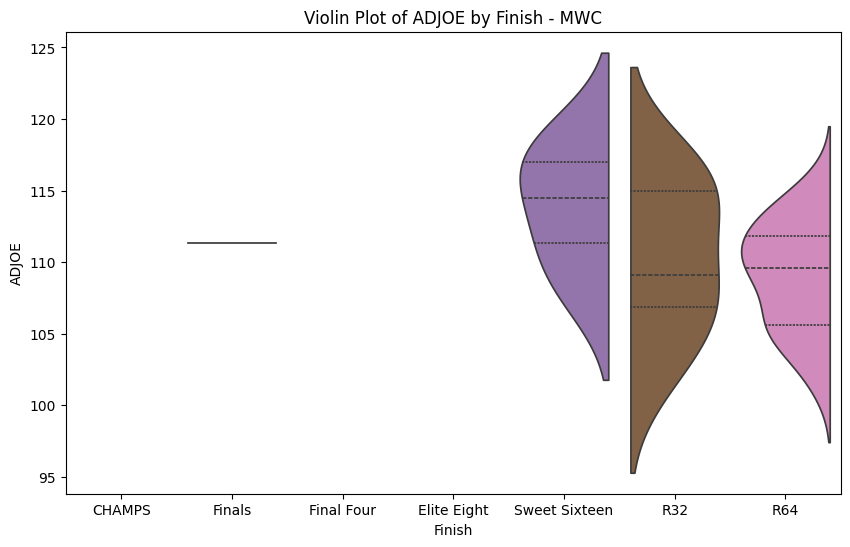

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


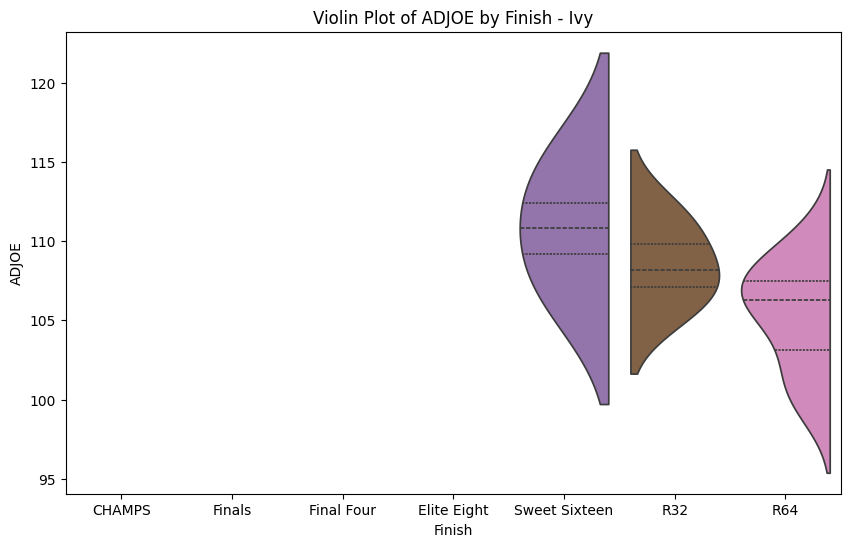

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


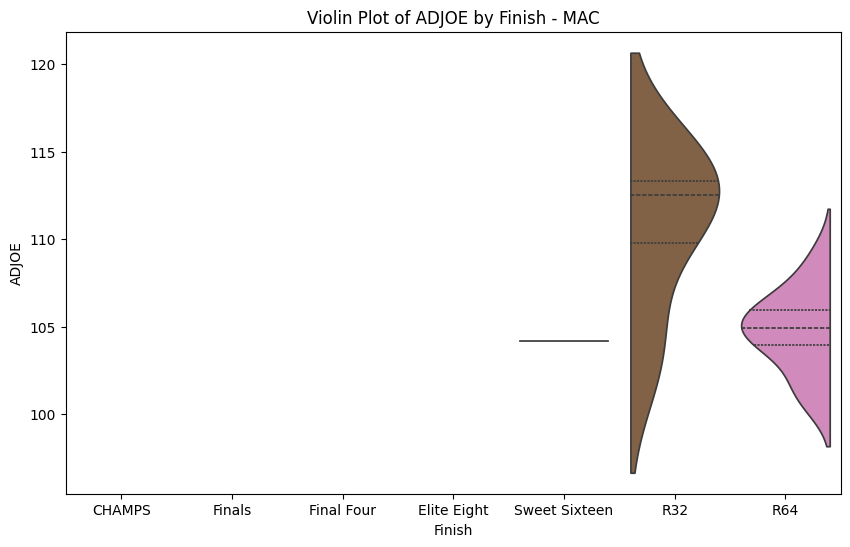

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


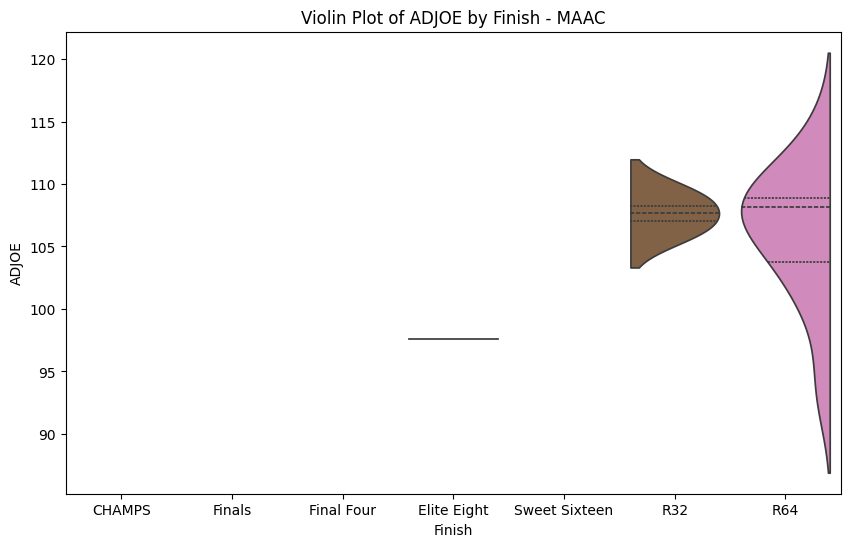

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


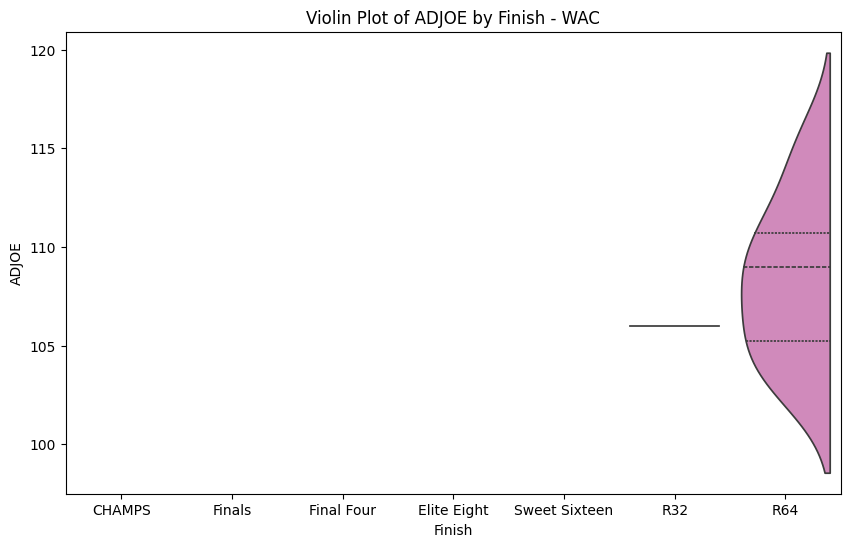

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


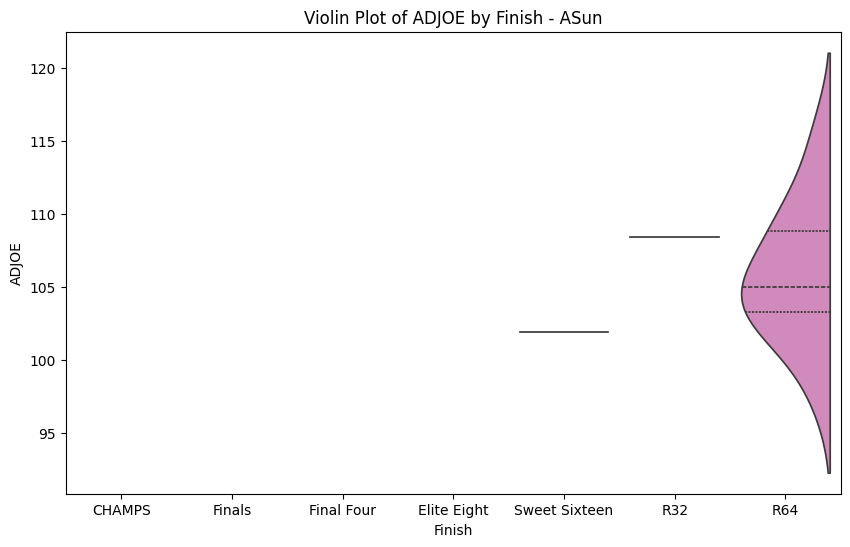

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


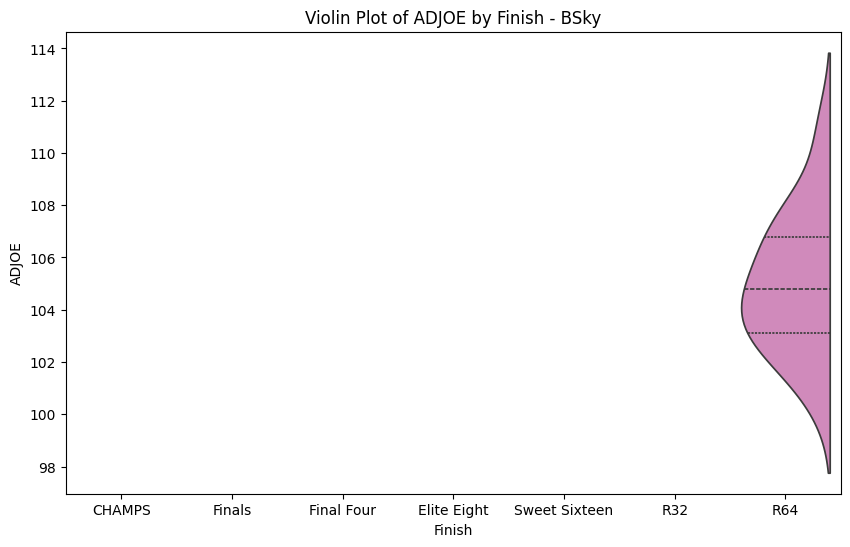

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


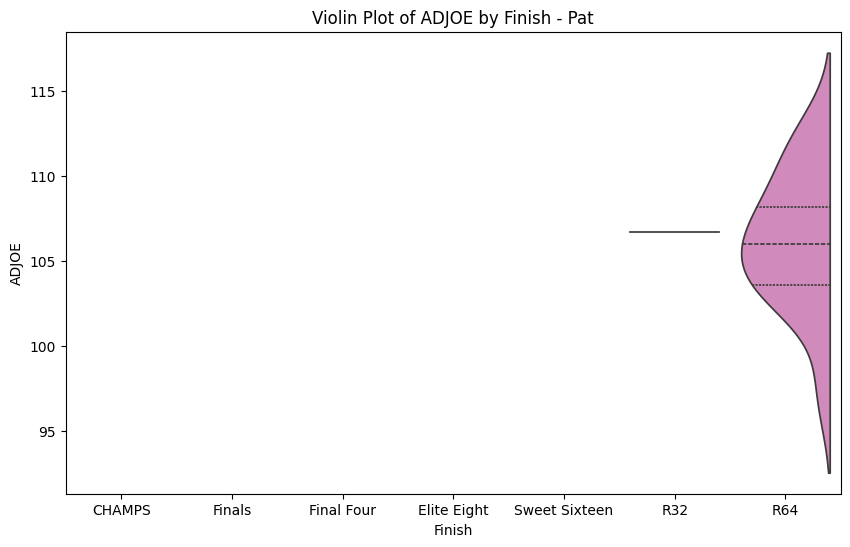

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


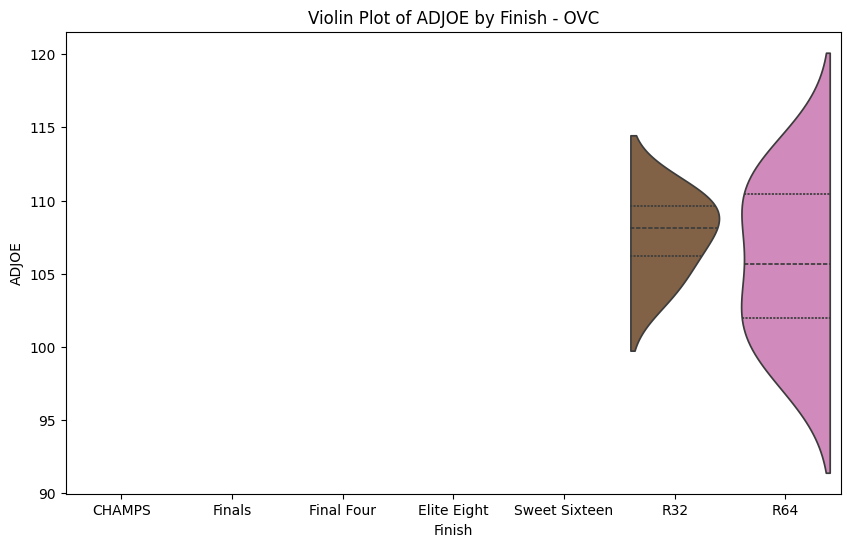

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


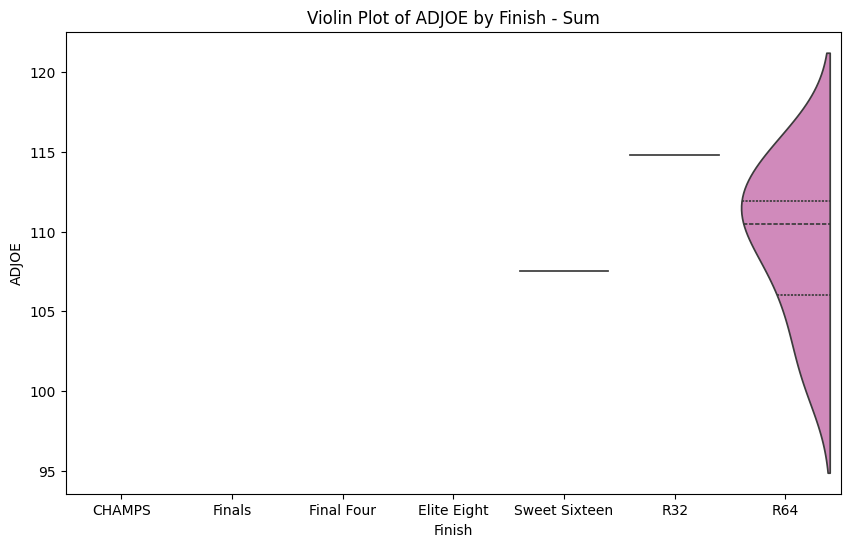

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


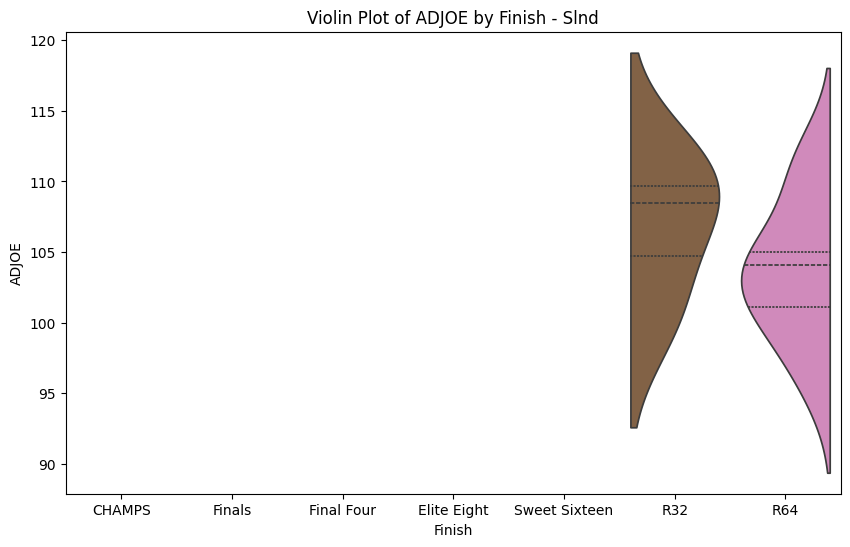

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


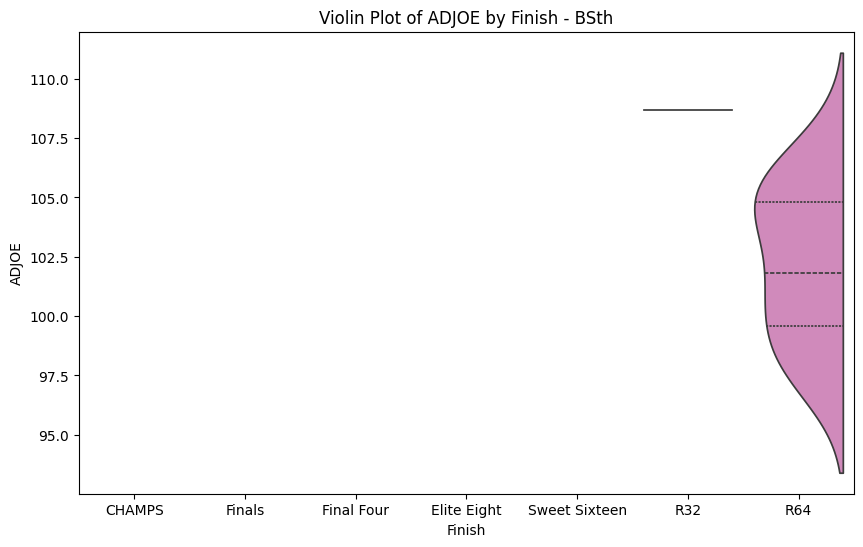

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


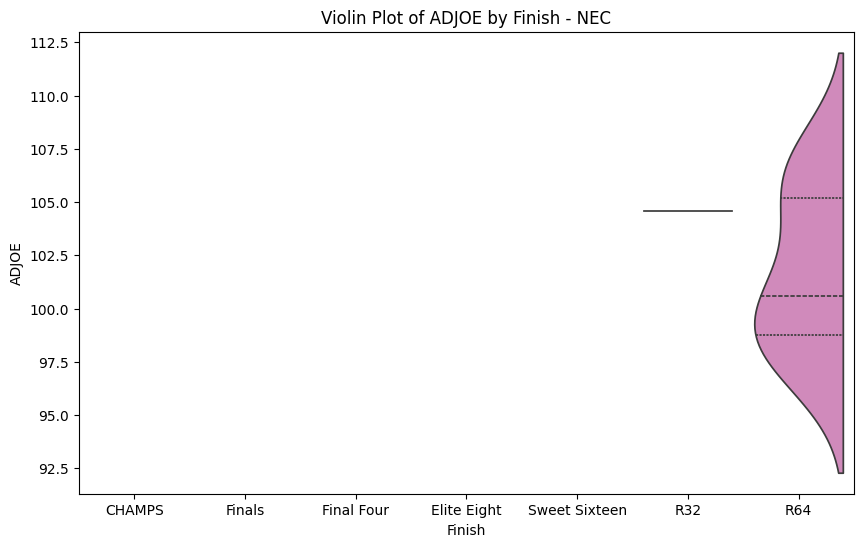

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


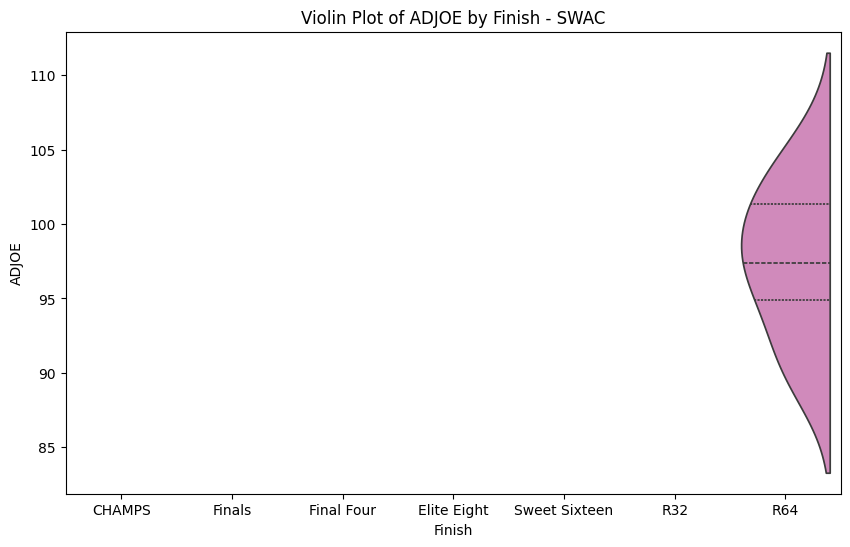

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


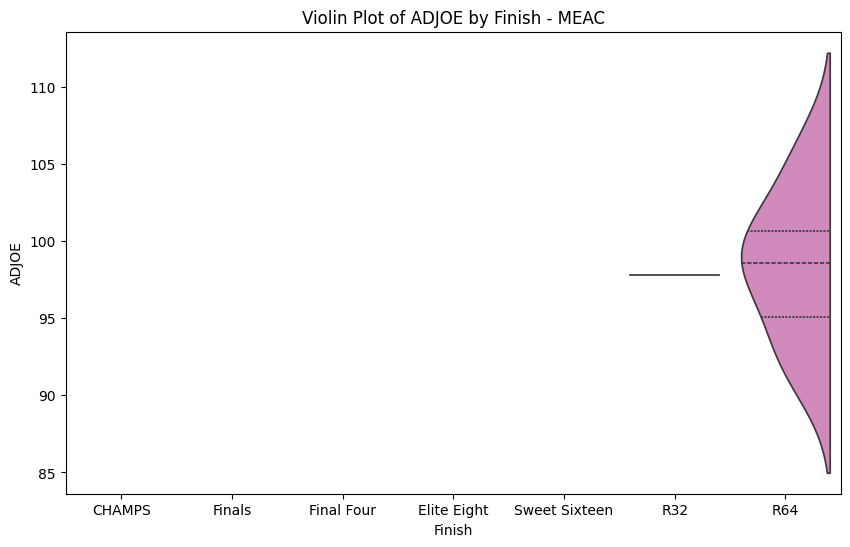

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


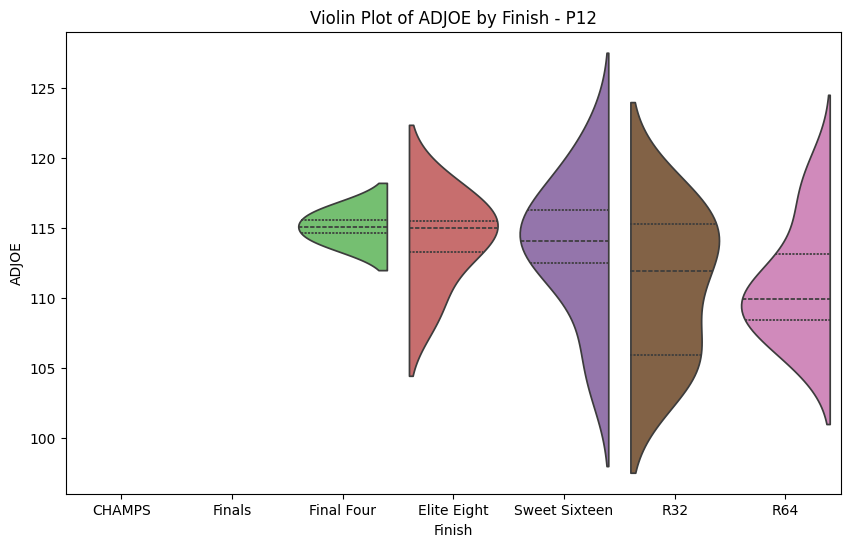

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3015625323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)


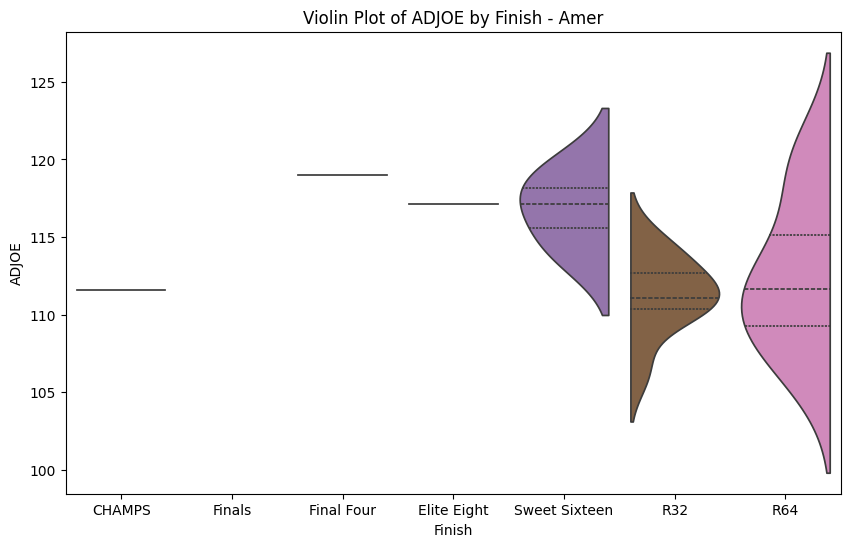

In [15]:
finish_order = ['CHAMPS', 'Finals', 'Final Four', 'Elite Eight', 'Sweet Sixteen', 'R32', 'R64']
unique_conferences = cbb['CONF'].unique()
# Iterate through each conference 
for conf in unique_conferences:
    plt.figure(figsize=(10, 6))
    conf_data = cbb[cbb['CONF'] == conf]

    # Violin plot of each conference to track where their teams have finished in March Madness historically
    sns.violinplot(x='FINISH', y='ADJOE', data=conf_data, split=True, inner="quart", palette="muted", order=finish_order)
    
    plt.title(f'Violin Plot of ADJOE by Finish - {conf}')
    plt.xlabel('Finish')
    plt.ylabel('ADJOE')
    plt.show()

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


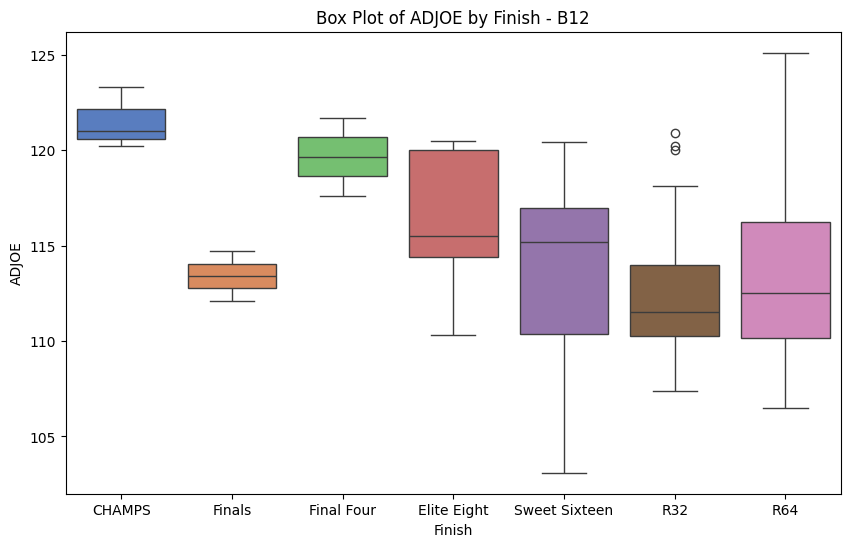

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


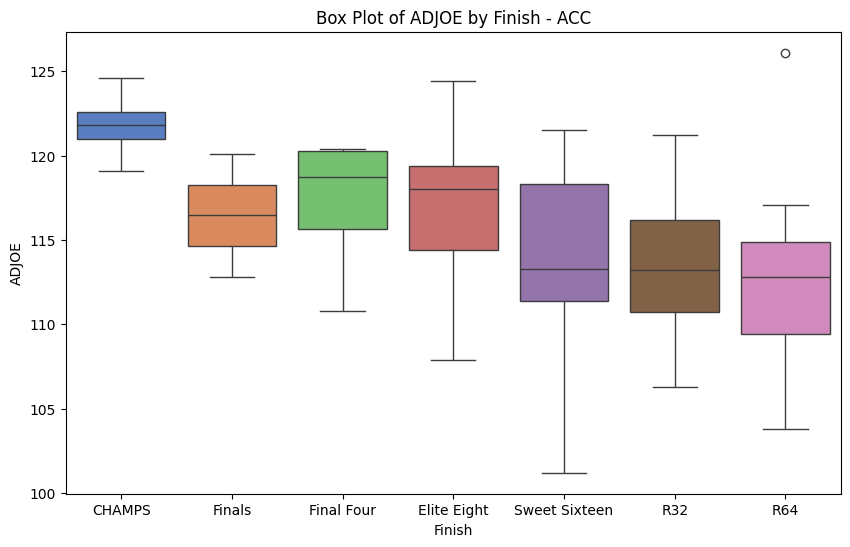

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


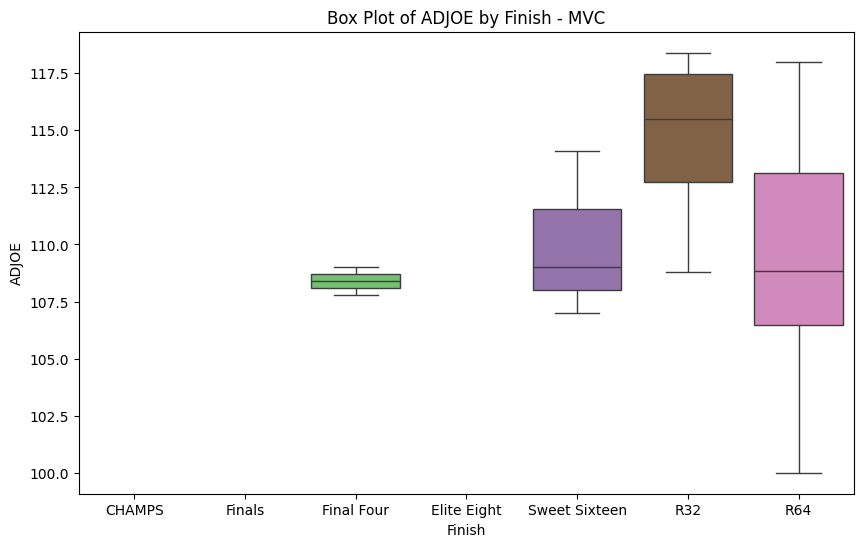

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


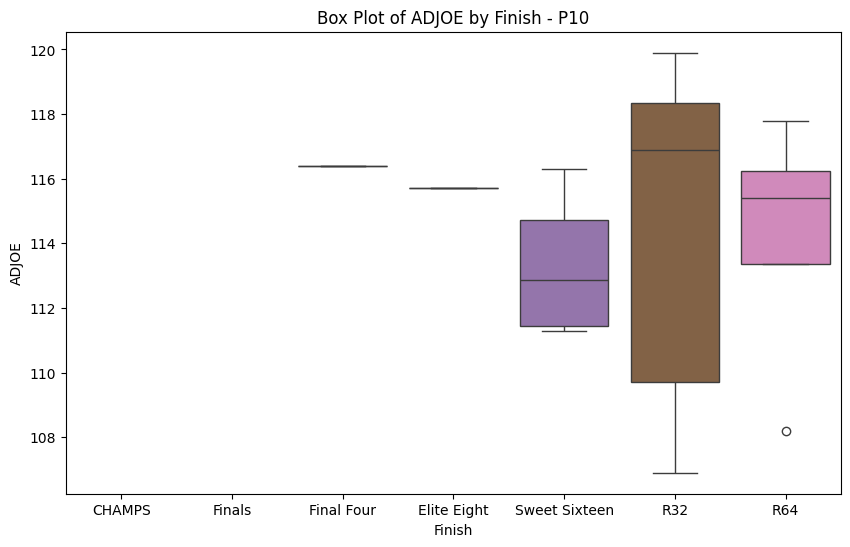

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


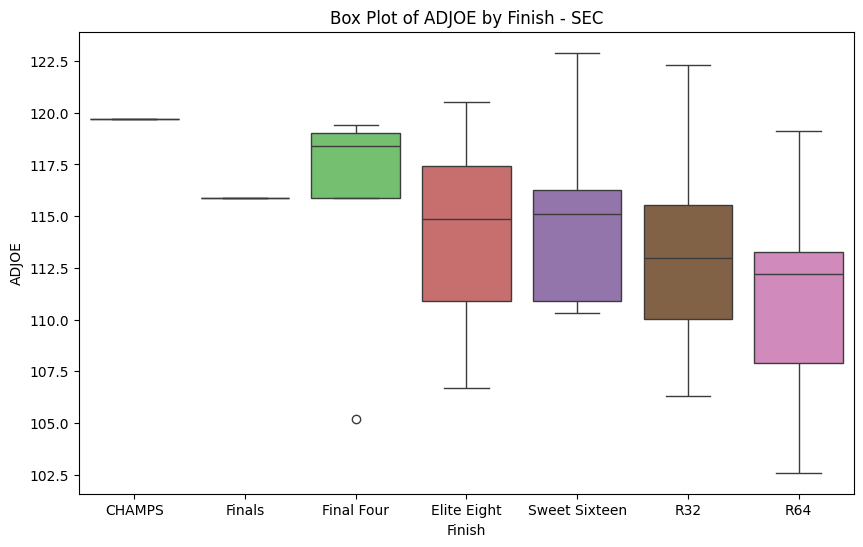

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


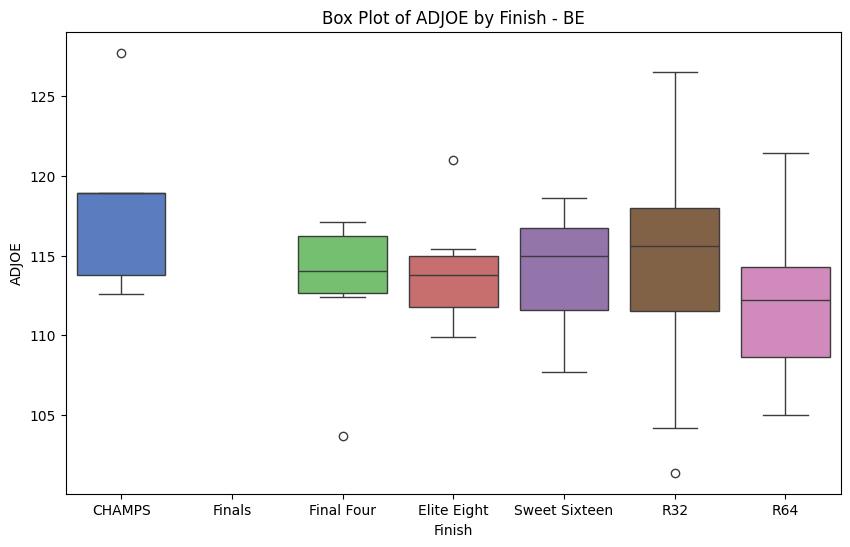

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


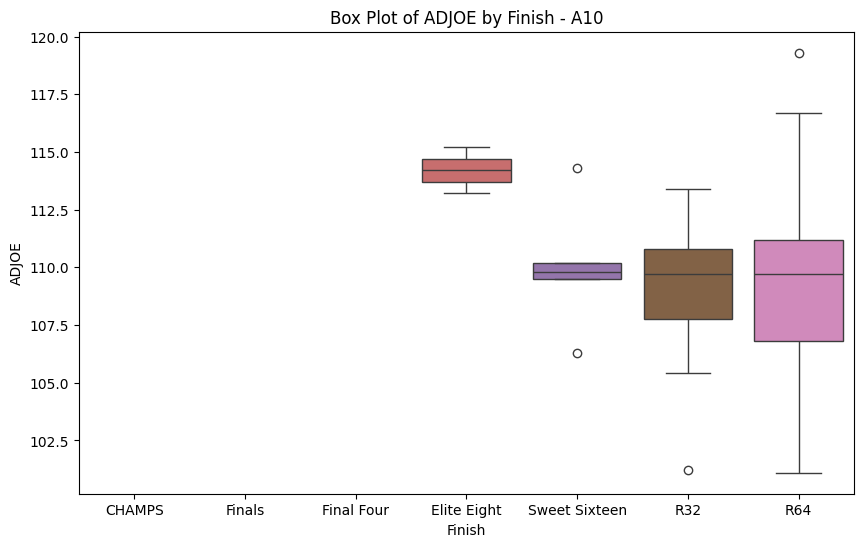

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


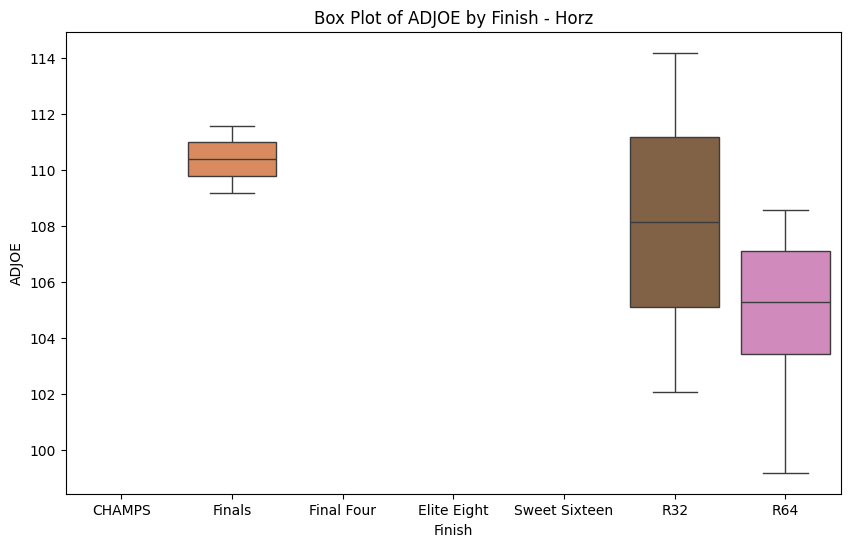

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


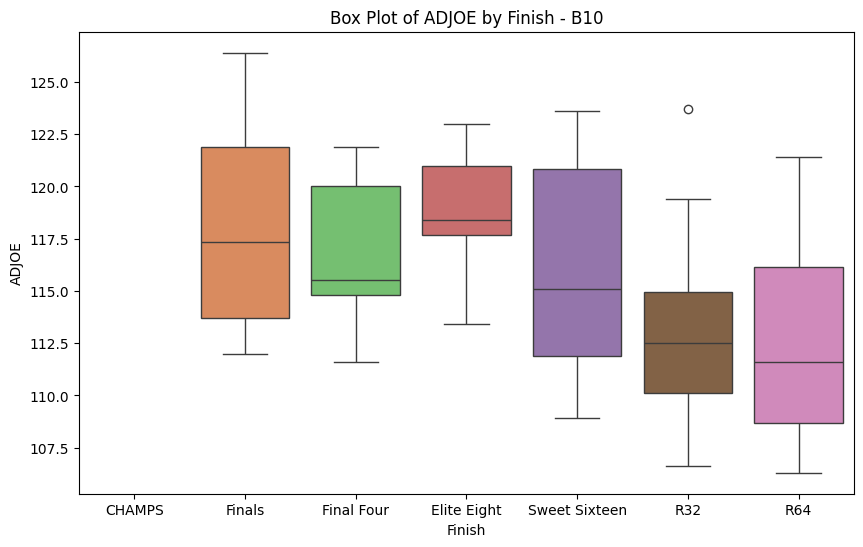

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


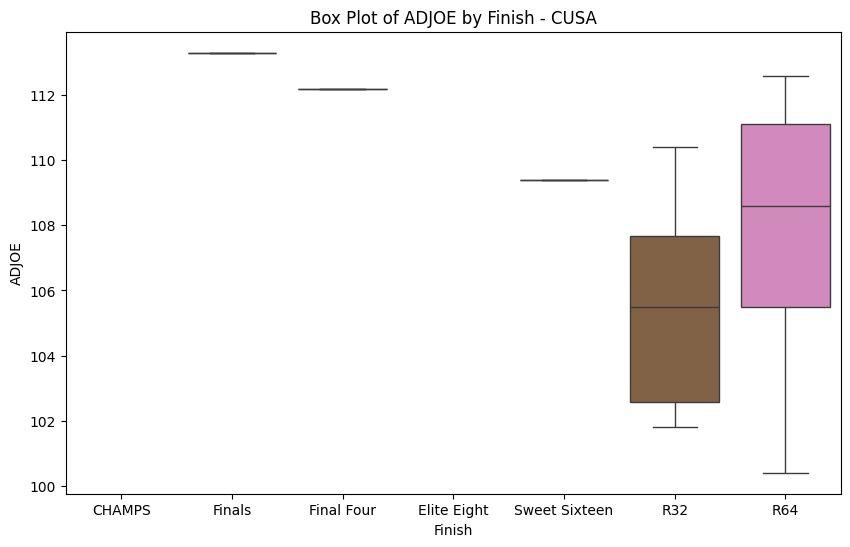

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


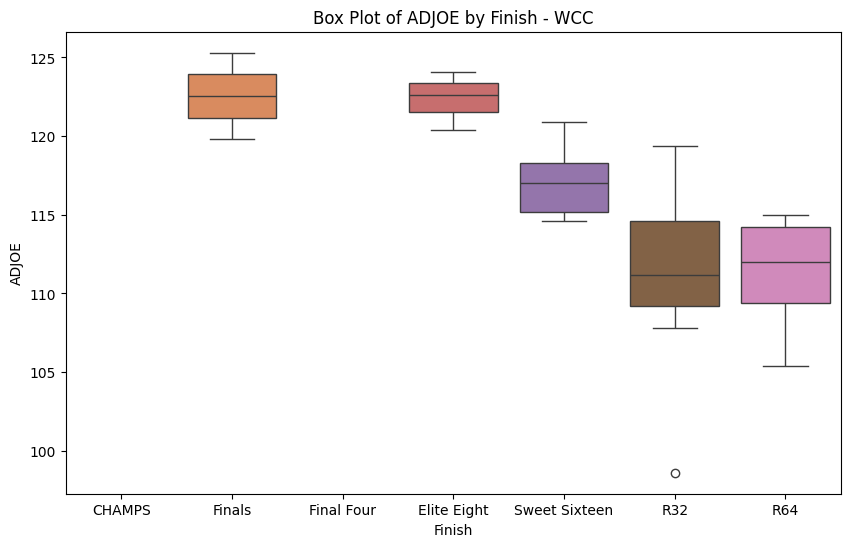

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


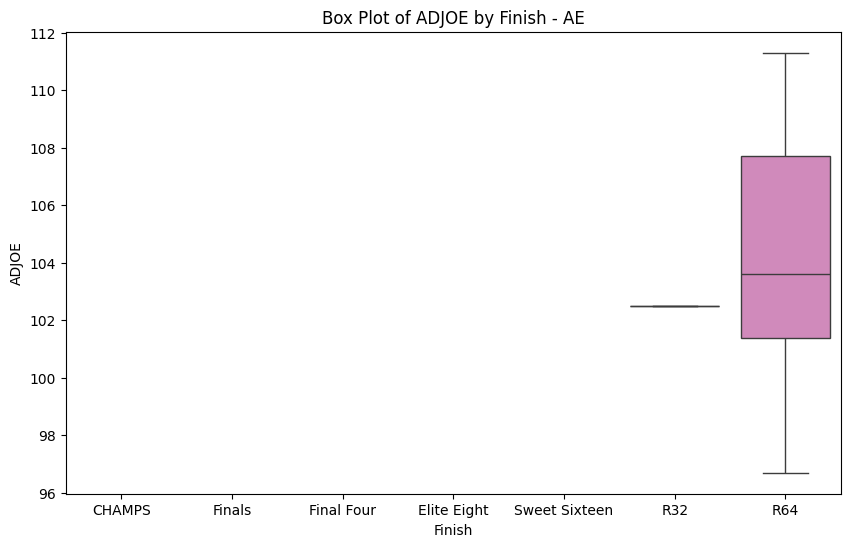

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


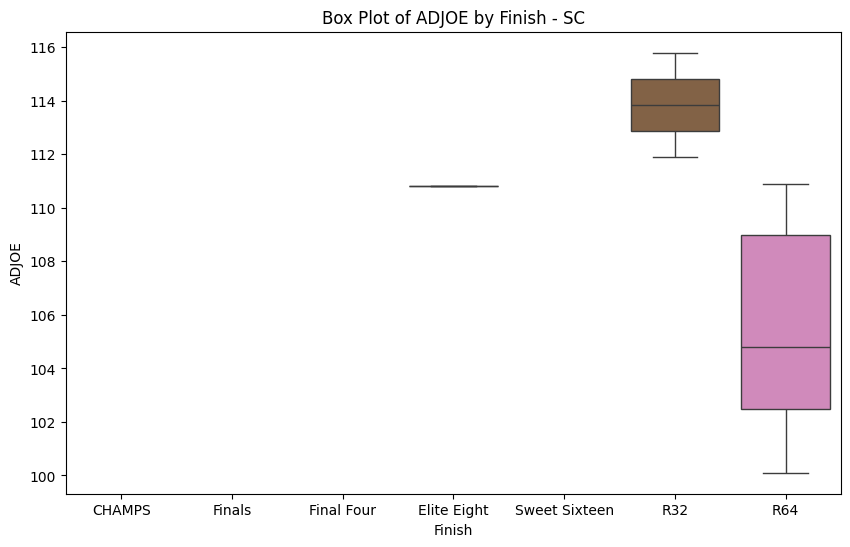

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


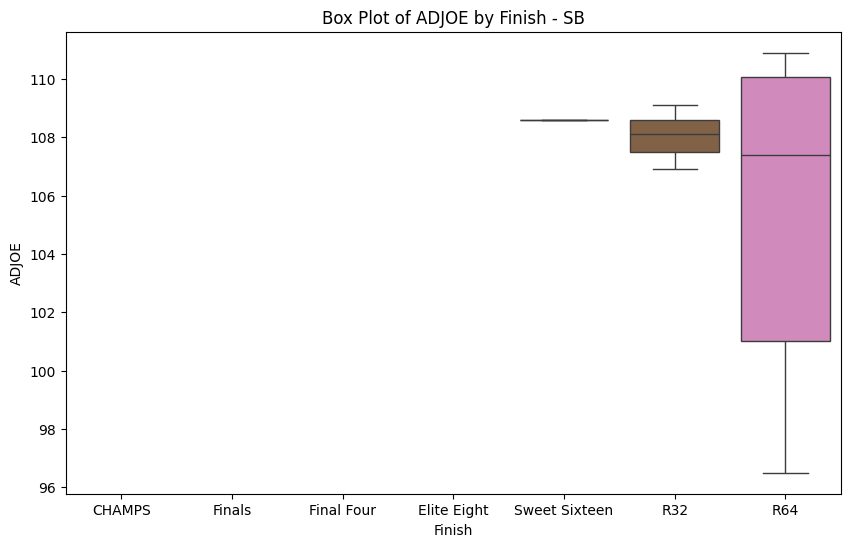

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


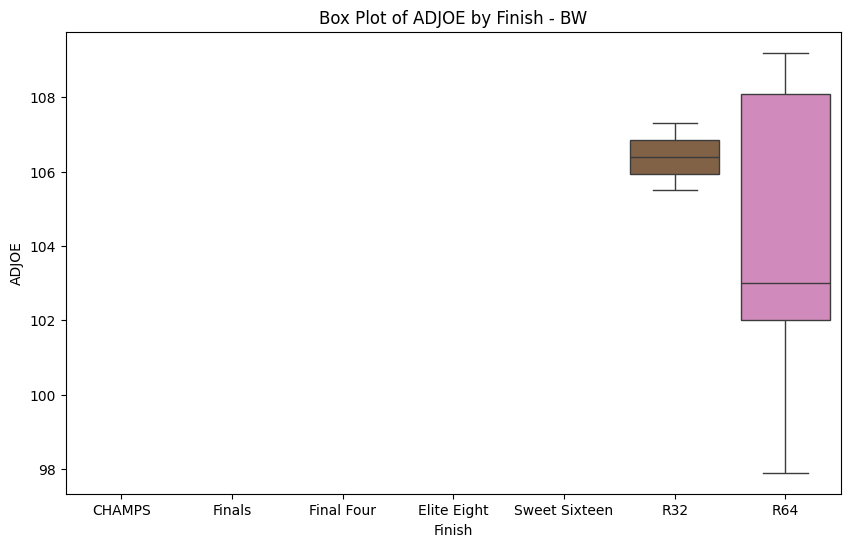

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


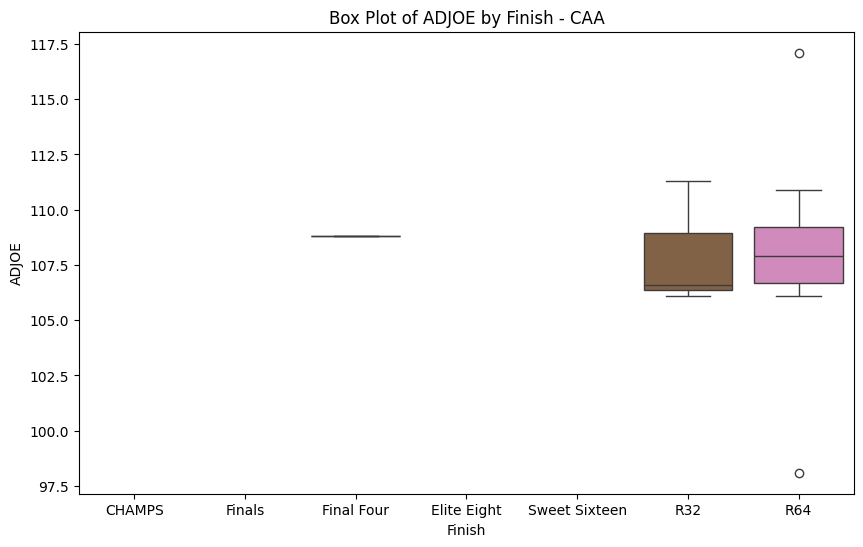

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


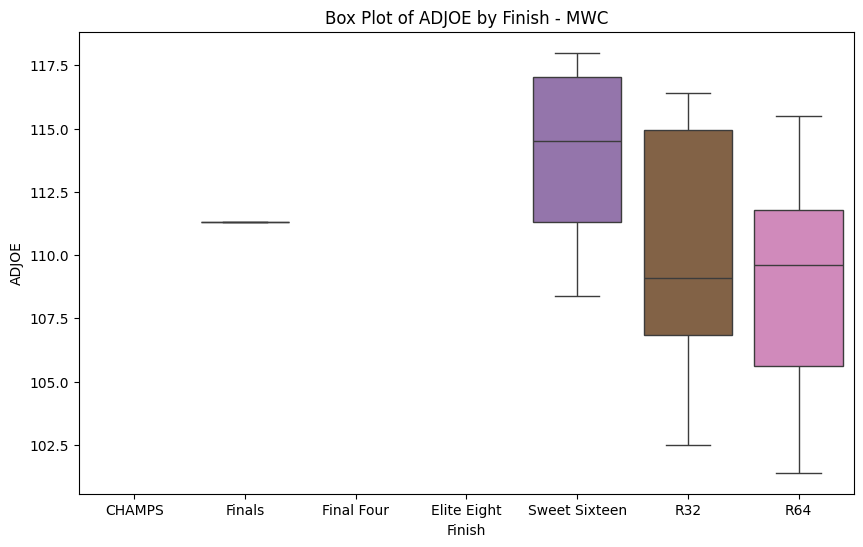

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


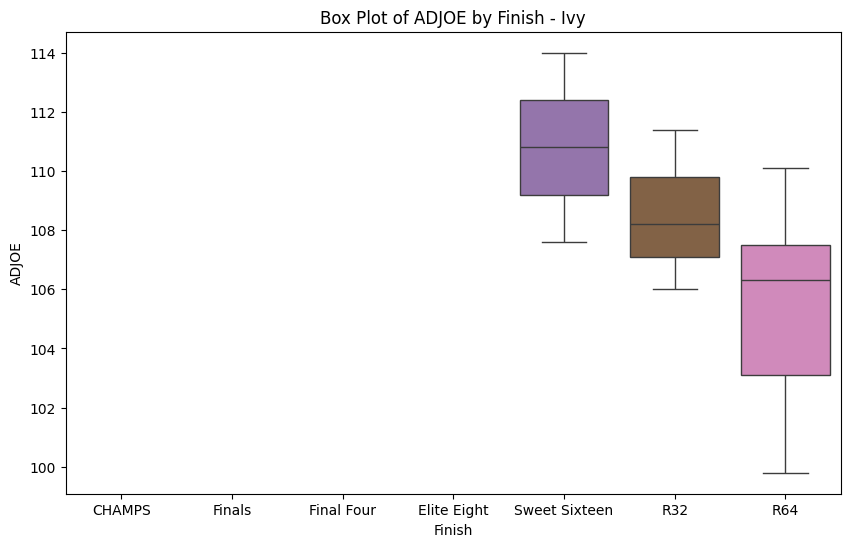

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


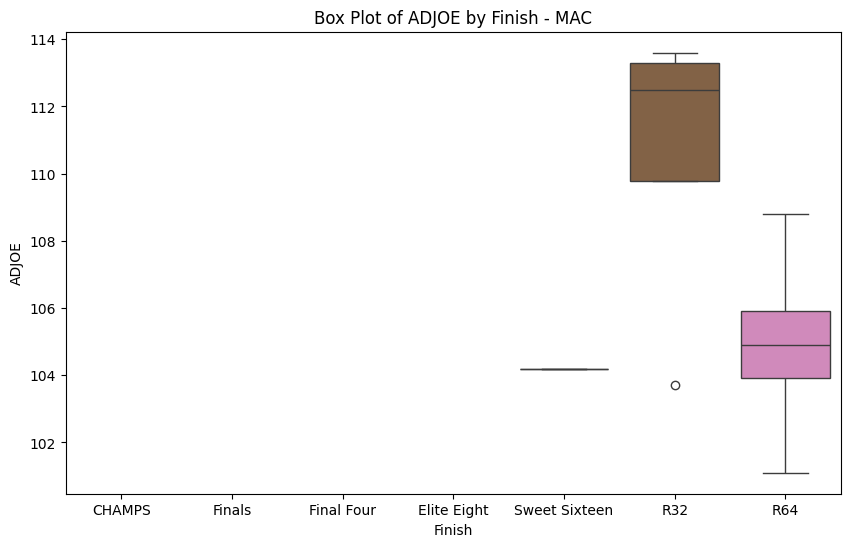

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


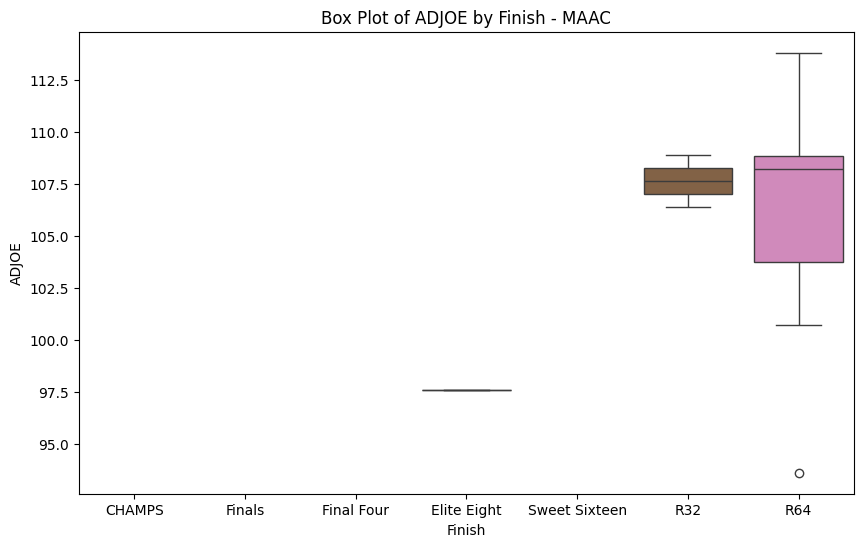

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


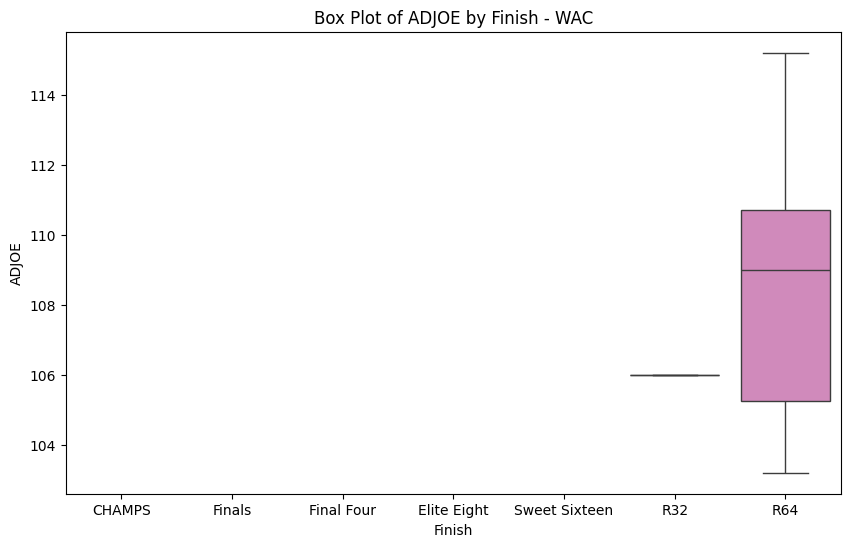

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


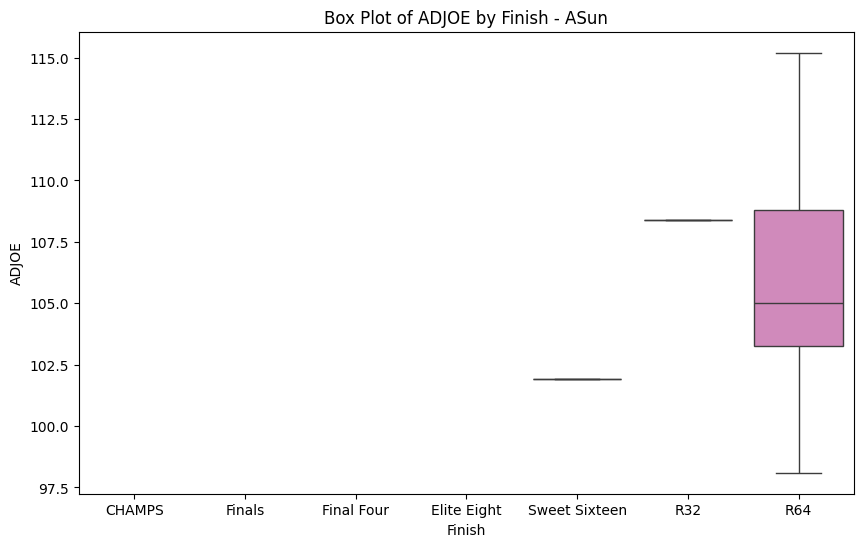

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


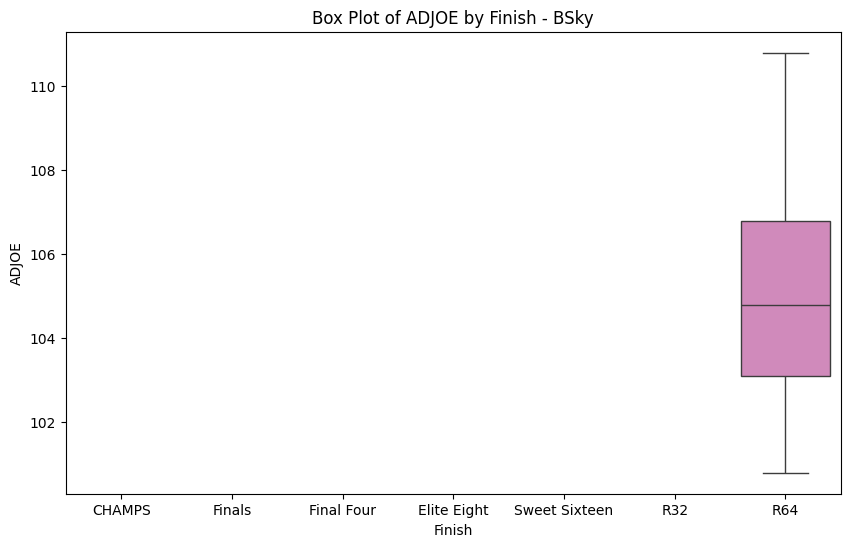

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


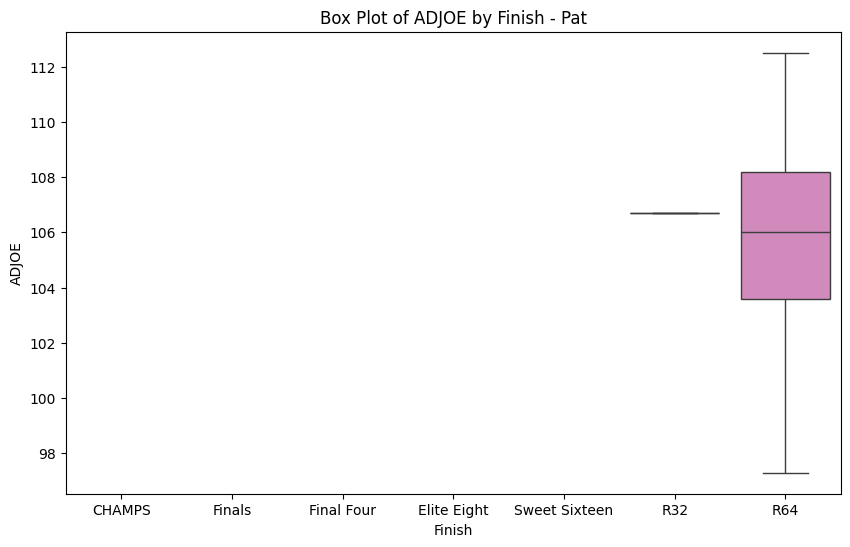

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


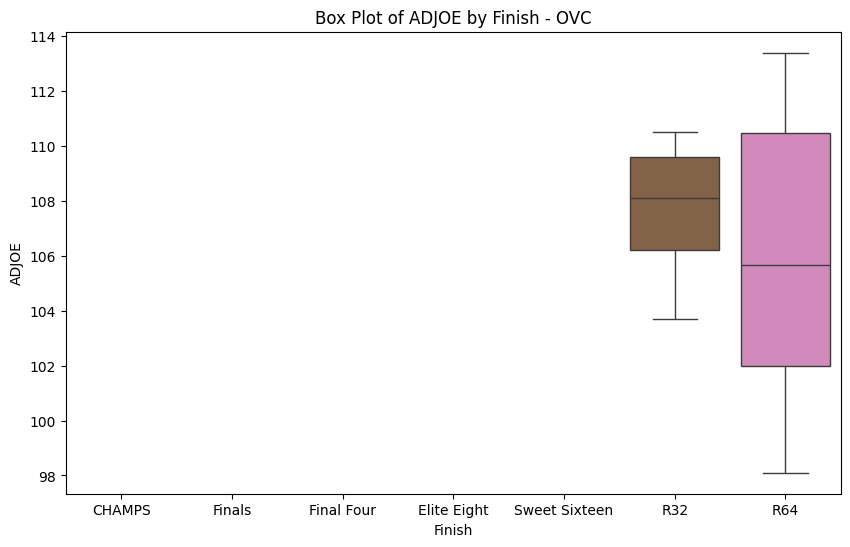

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


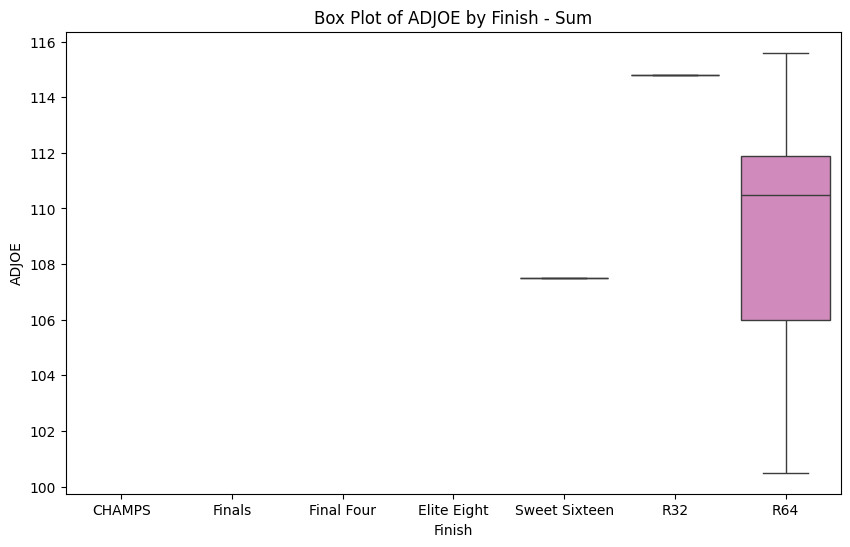

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


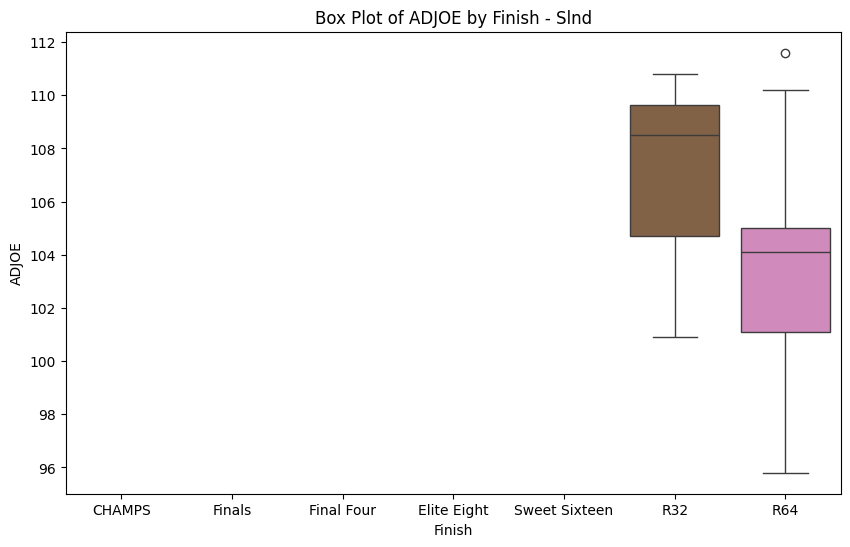

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


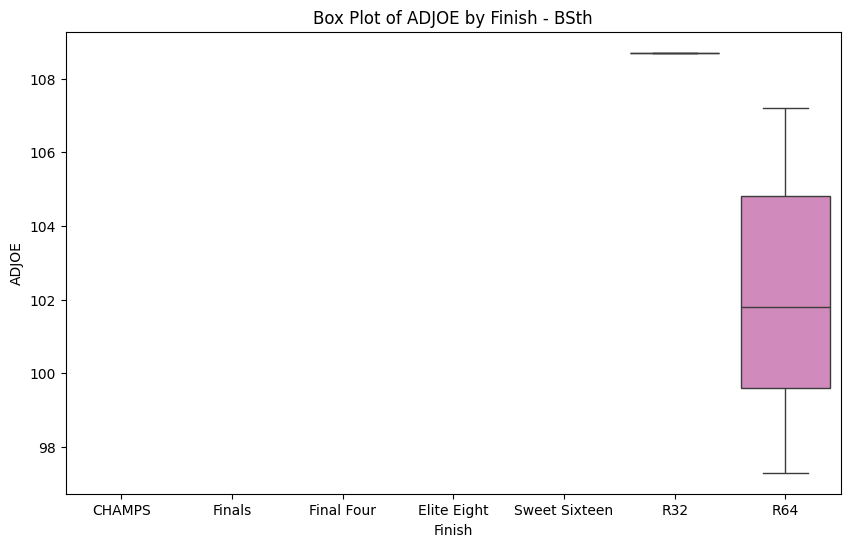

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


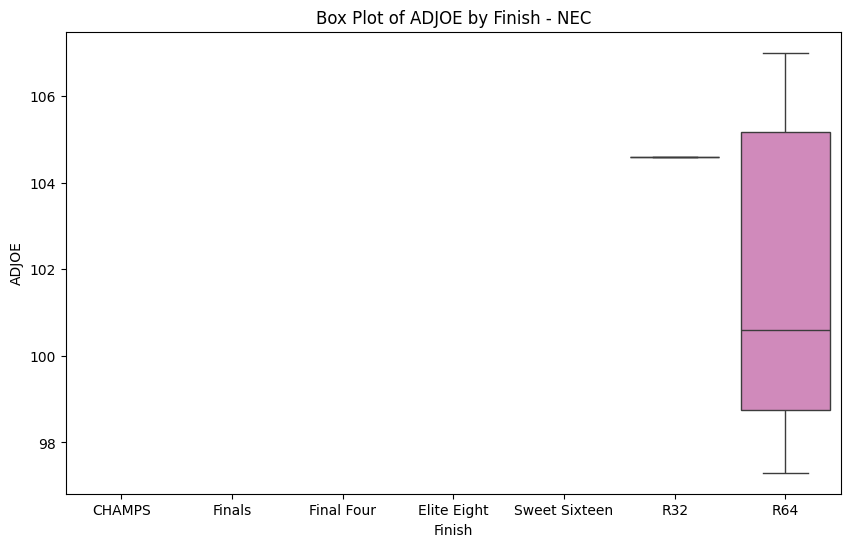

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


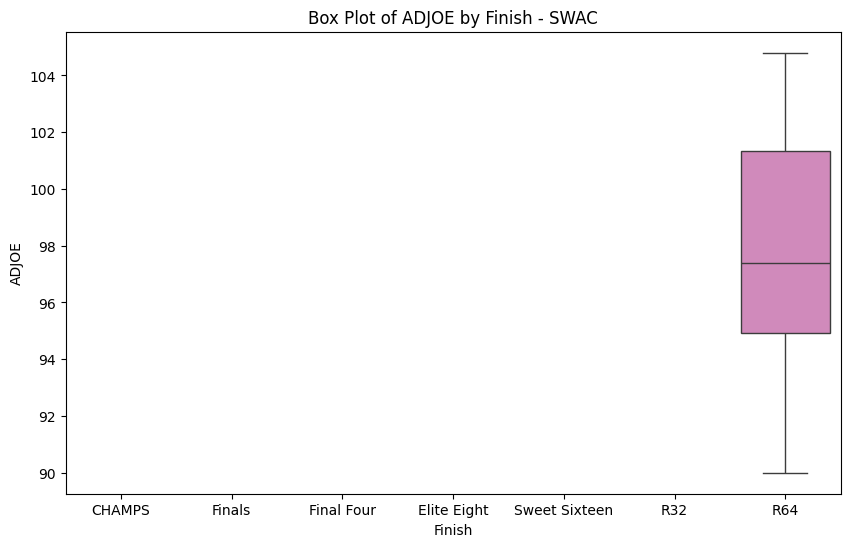

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


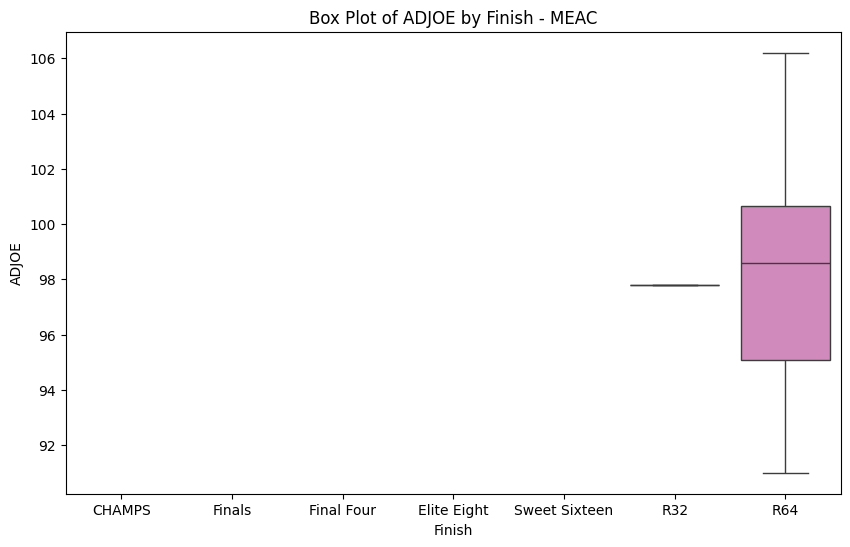

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


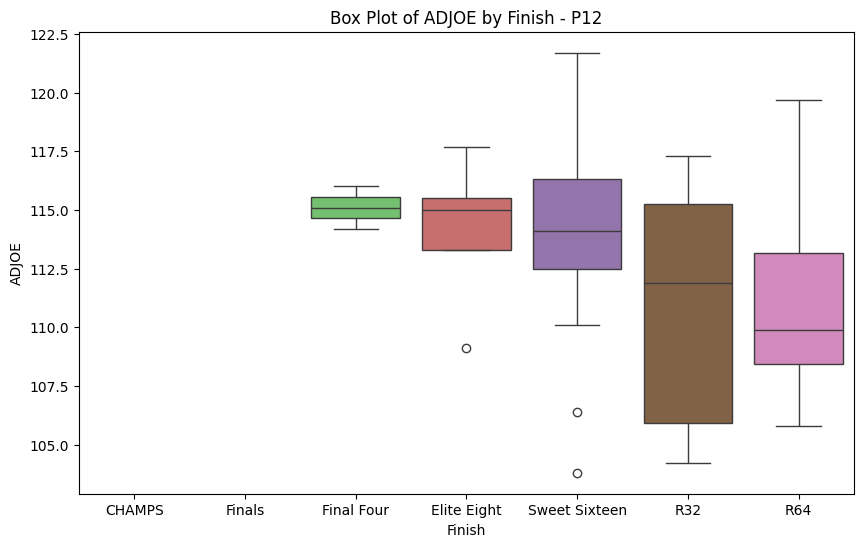

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/1140466337.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")


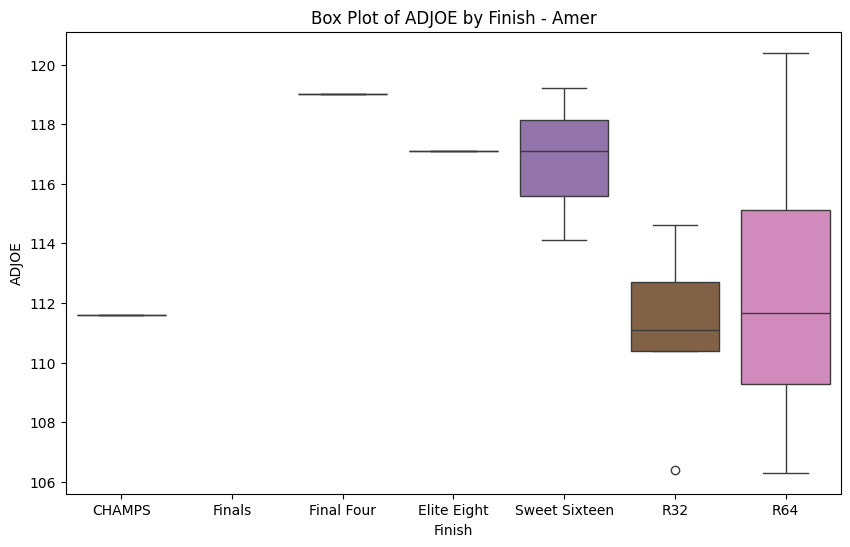

In [16]:
finish_order = ['CHAMPS', 'Finals', 'Final Four', 'Elite Eight', 'Sweet Sixteen', 'R32', 'R64']
    # box plot of each conference to track where their teams have finished in March Madness historically

for conf in unique_conferences:
    plt.figure(figsize=(10, 6))
    conf_data = cbb[cbb['CONF'] == conf]
    sns.boxplot(x='FINISH', y='ADJOE', data=conf_data, order=finish_order, palette="muted")
    
    plt.title(f'Box Plot of ADJOE by Finish - {conf}')
    plt.xlabel('Finish')
    plt.ylabel('ADJOE')
    plt.show()

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3941249855.py:2: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(x='FINISH', y='ADJOE', hue='CONF', data=cbb, dodge=True, join=False, capsize=0.1, palette="muted", order=finish_order)


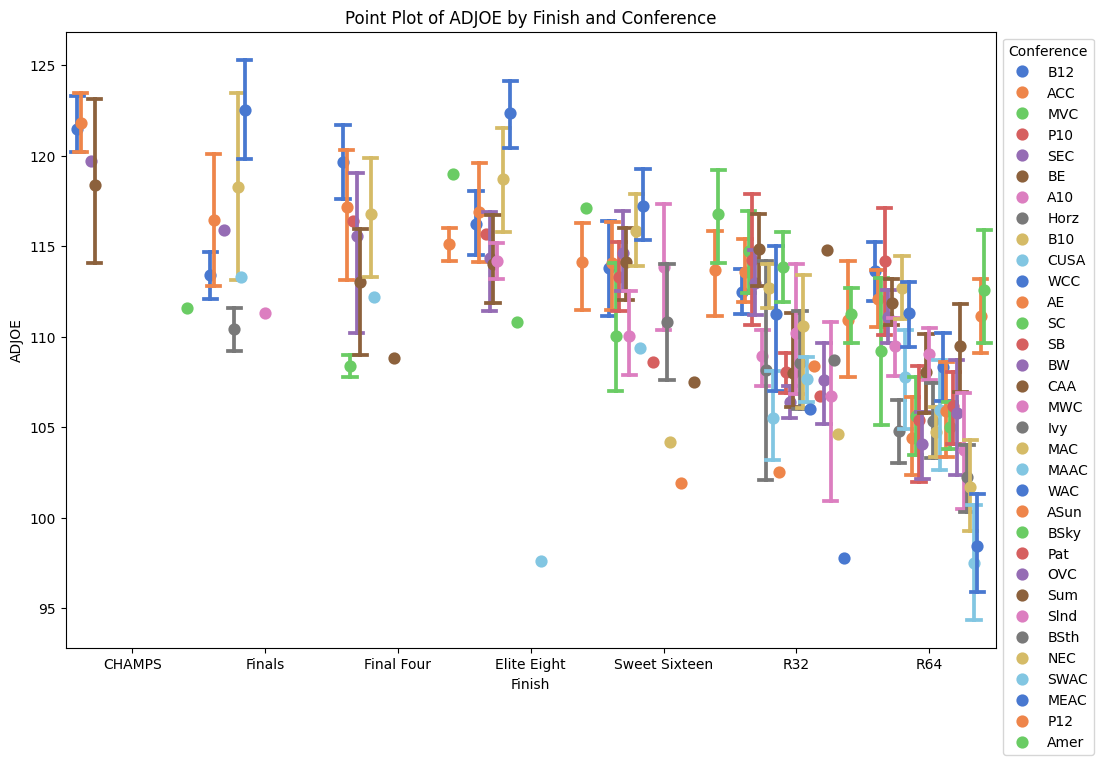

In [17]:
plt.figure(figsize=(12, 8))
sns.pointplot(x='FINISH', y='ADJOE', hue='CONF', data=cbb, dodge=True, join=False, capsize=0.1, palette="muted", order=finish_order)
plt.title('Point Plot of ADJOE by Finish and Conference')
plt.xlabel('Finish')
plt.ylabel('ADJOE')
plt.legend(title='Conference', bbox_to_anchor=(1, 1))
plt.show()
#point plot of ADJOE (Adjusted Offensive Efficiency) by conference and by finish in March Madness

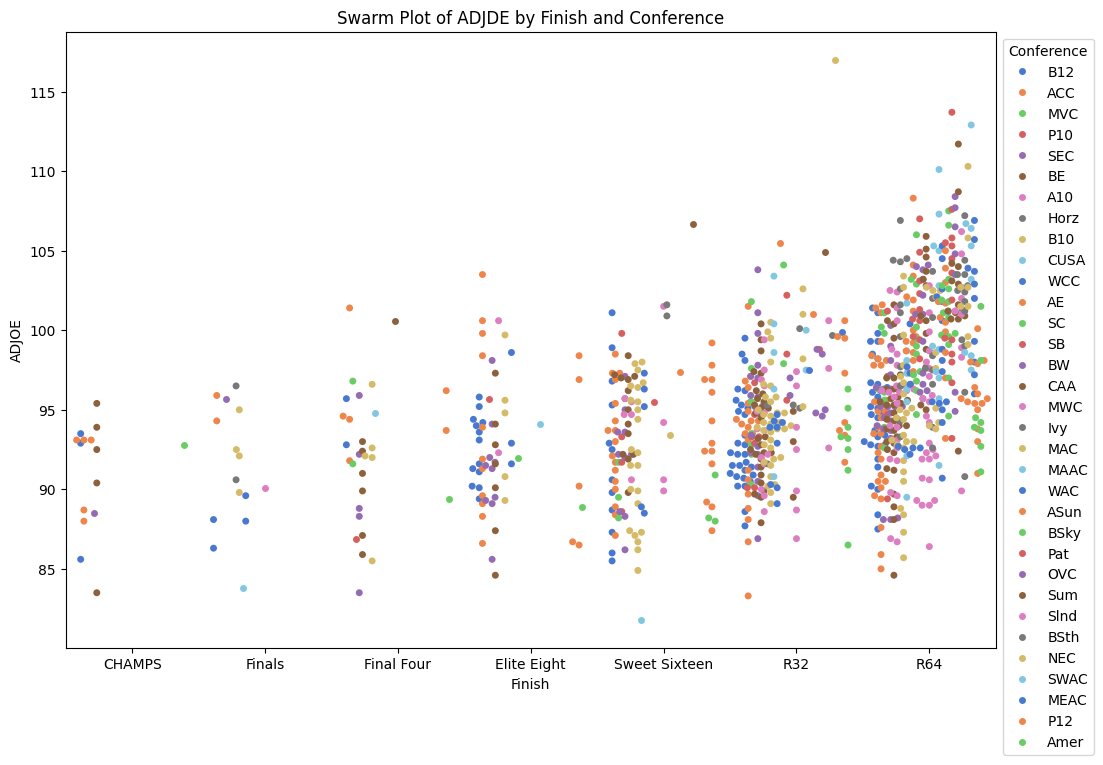

In [18]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='FINISH', y='ADJDE', hue='CONF', data=cbb, dodge=True, palette="muted", order=finish_order)
plt.title('Swarm Plot of ADJDE by Finish and Conference')
plt.xlabel('Finish')
plt.ylabel('ADJOE')
plt.legend(title='Conference', bbox_to_anchor=(1, 1))
plt.show()
#point plot of ADJDE (Adjusted Defensive Efficiency) by conference and by finish in March Madness

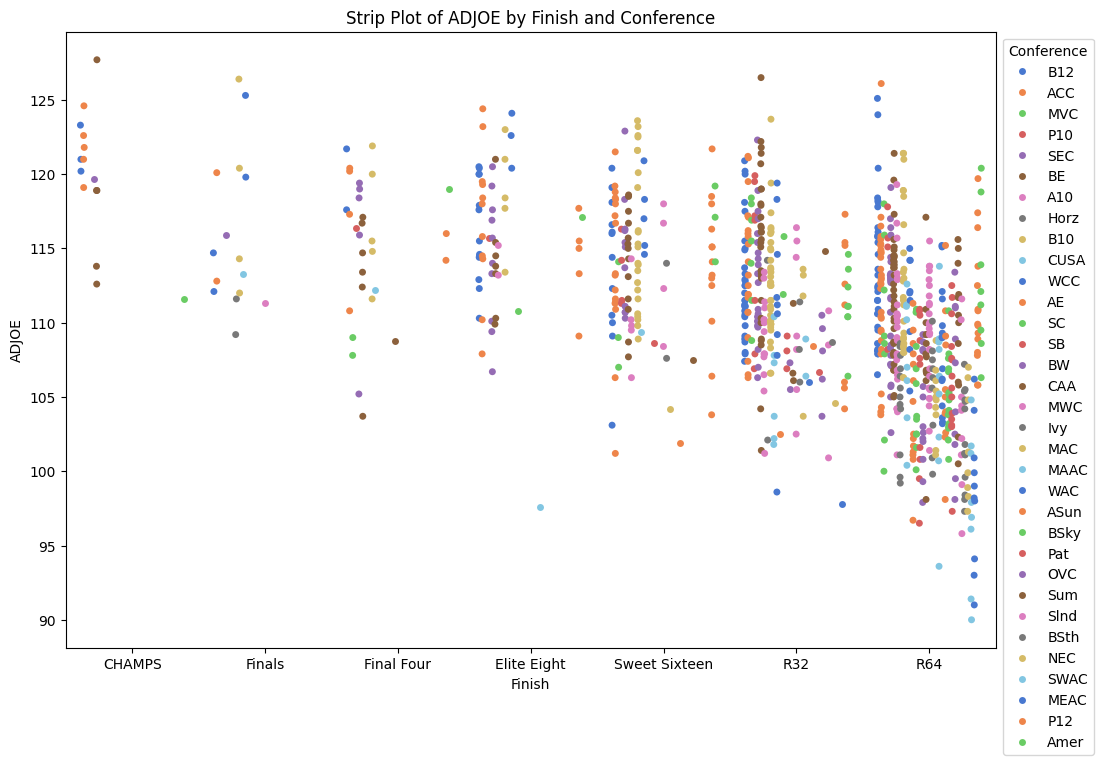

In [19]:
plt.figure(figsize=(12, 8))
sns.stripplot(x='FINISH', y='ADJOE', hue='CONF', data=cbb, dodge=True, jitter=True, palette="muted", order=finish_order)
plt.title('Strip Plot of ADJOE by Finish and Conference')
plt.xlabel('Finish')
plt.ylabel('ADJOE')
plt.legend(title='Conference', bbox_to_anchor=(1, 1))
plt.show()
##same as last one but for offense

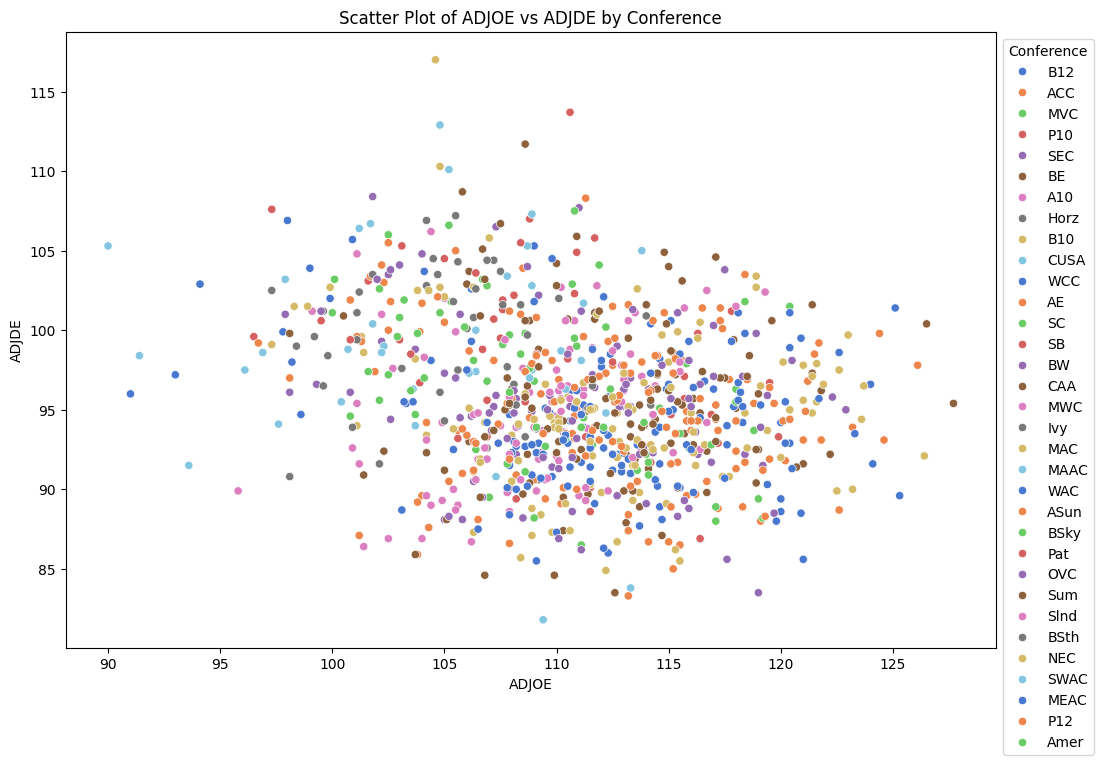

In [20]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='ADJOE', y='ADJDE', hue='CONF', data=cbb, palette="muted")
plt.title('Scatter Plot of ADJOE vs ADJDE by Conference')
plt.xlabel('ADJOE')
plt.ylabel('ADJDE')
plt.legend(title='Conference', bbox_to_anchor=(1, 1))
plt.show()
#

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/4076436614.py:2: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x='CONF', y='ADJOE', data=cbb, palette="muted", hue='CONF', dodge=True, join=False, capsize=0.1)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


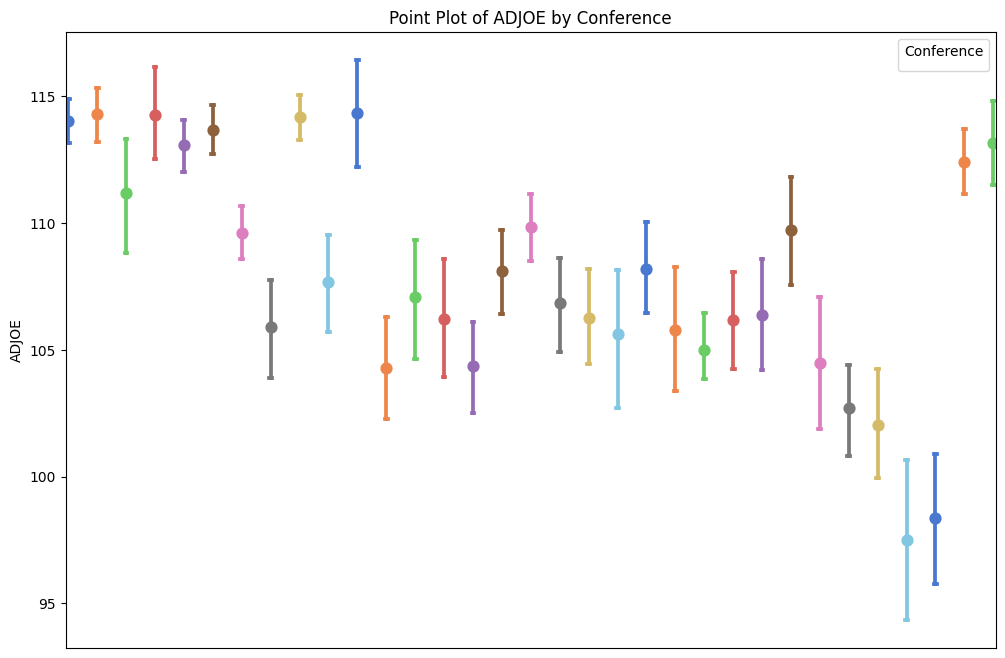

In [21]:

plt.figure(figsize=(12, 8))
ax = sns.pointplot(x='CONF', y='ADJOE', data=cbb, palette="muted", hue='CONF', dodge=True, join=False, capsize=0.1)
ax.get_xaxis().set_visible(False)
plt.title('Point Plot of ADJOE by Conference')
plt.ylabel('ADJOE')
plt.legend(title='Conference', bbox_to_anchor=(1, 1))
plt.show()
##point plot to demonstrate ADJOE by coference

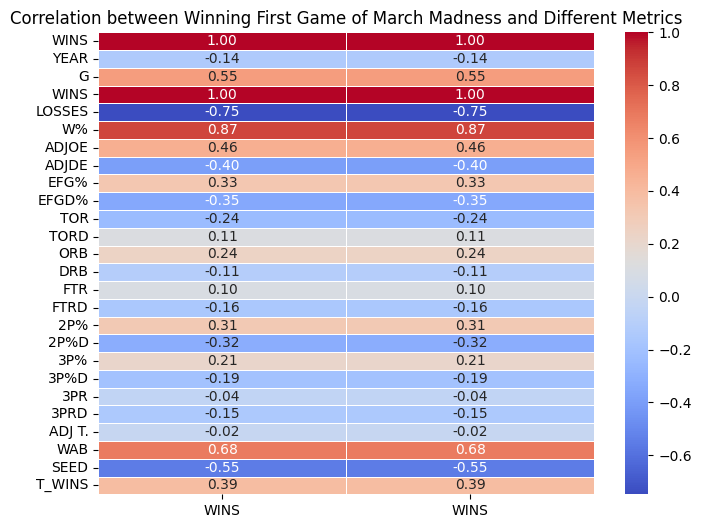

In [22]:
numerical_columns = cbb.select_dtypes(include=['float64', 'int64']).columns

filtered_cbb = cbb[cbb['WINS'] >= 1]

selected_columns = ['WINS'] + list(numerical_columns)
selected_data = filtered_cbb[selected_columns]

correlation_matrix = selected_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[['WINS']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation between Winning First Game of March Madness and Different Metrics')
plt.show()


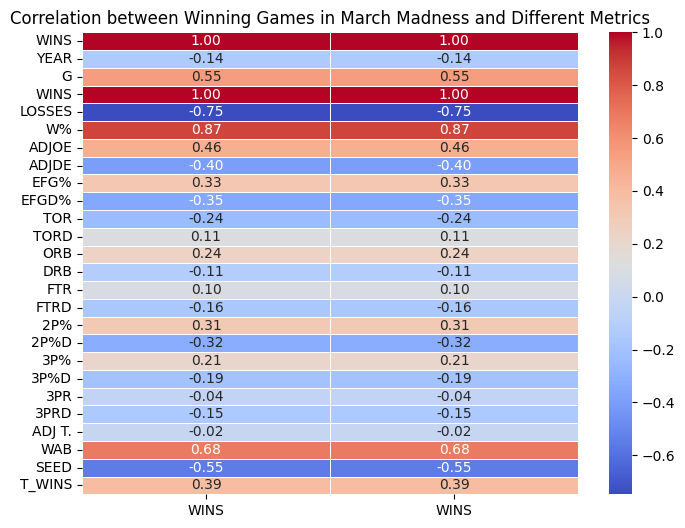

In [23]:

numerical_columns = cbb.select_dtypes(include=['float64', 'int64']).columns

selected_columns = ['WINS'] + list(numerical_columns)
selected_data = cbb[selected_columns]

correlation_matrix = selected_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[['WINS']], annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation between Winning Games in March Madness and Different Metrics')
plt.show()

In [24]:
power_5_confs = ['ACC', 'B10', 'B12', 'P12', 'SEC', 'P10']

power_5 = data[data['CONF'].isin(power_5_confs)]
nonpower_5 = data[~data['CONF'].isin(power_5_confs)]
print(power_5.head(10))
nonpower_5.head(10)

    YEAR            TEAM CONF     G  WINS  LOSSES     W%  ADJOE  ADJDE  EFG%  \
0   2008          Kansas  B12  33.0  30.0     3.0  0.909  121.0   85.6  56.3   
1   2008  North Carolina  ACC  34.0  32.0     2.0  0.941  120.2   91.8  52.4   
2   2008           Texas  B12  33.0  27.0     6.0  0.818  120.0   94.2  51.4   
4   2008          Oregon  P10  31.0  18.0    13.0  0.581  117.8  101.2  56.3   
5   2008            Duke  ACC  32.0  27.0     5.0  0.844  117.2   88.8  54.1   
6   2008            UCLA  P10  33.0  30.0     3.0  0.909  116.4   86.9  52.3   
7   2008       Tennessee  SEC  32.0  28.0     4.0  0.875  116.3   92.2  52.8   
11  2008         Arizona  P10  32.0  18.0    14.0  0.562  115.1   94.7  53.9   
12  2008          Baylor  B12  30.0  20.0    10.0  0.667  114.6   98.2  52.1   
15  2008  Washington St.  P10  32.0  24.0     8.0  0.750  114.2   91.7  54.4   

    ...   3P%  3P%D   3PR  3PRD  ADJ T.   WAB  SEED         FINISH  T_WINS  \
0   ...  39.9  34.0  29.2  38.1    69.5  

YEAR            TEAM  CONF     G  WINS  LOSSES     W%  ADJOE  ADJDE  EFG%  \
3   2008           Drake   MVC  30.0  26.0     4.0  0.867  118.0   96.3  52.8   
8   2008      Pittsburgh    BE  34.0  25.0     9.0  0.735  116.1   95.7  51.1   
9   2008      Notre Dame    BE  31.0  24.0     7.0  0.774  115.6   95.3  52.8   
10  2008          Xavier   A10  33.0  27.0     6.0  0.818  115.2   92.3  55.0   
13  2008     Connecticut    BE  32.0  24.0     8.0  0.750  114.4   94.4  50.8   
14  2008          Butler  Horz  32.0  29.0     3.0  0.906  114.2   95.3  54.1   
19  2008  Saint Joseph's   A10  33.0  21.0    12.0  0.636  113.3   98.5  54.6   
20  2008         Memphis  CUSA  34.0  33.0     1.0  0.971  113.3   83.8  53.0   
21  2008   West Virginia    BE  33.0  23.0    10.0  0.697  113.1   92.2  51.6   
22  2008      Georgetown    BE  32.0  27.0     5.0  0.844  113.1   87.9  56.2   

    ...   3P%  3P%D   3PR  3PRD  ADJ T.  WAB  SEED         FINISH  T_WINS  \
3   ...  36.6  33.8  45.5  39.3    64.2  5.2   5.0            R64     0.0   
8   ...  34.3  32.8  30.3  34.7    65.2  5.3   4.0            R32     1.0   
9   ...  41.0  34.1  33.5  33.3    70.8  4.4   5.0            R32     1.0   
10  ...  39.2  33.5  37.1  37.8    65.8  4.7   3.0    Elite Eight     3.0   
13  ...  35.9  34.8  25.2  32.4    69.3  4.3   4.0            R64     0.0   
14  ...  37.6  32.1  48.6  31.3    61.2  4.7   7.0            R32     1.0   
19  ...  38.5  36.9  35.8  37.7    65.5 -1.2  11.0            R64     0.0   
20  ...  35.0  29.8  36.7  28.7    70.7  8.9   1.0         Finals     5.0   
21  ...  35.8  35.4  35.0  32.1    65.8  2.6   7.0  Sweet Sixteen     2.0   
22  ...  38.0  29.9  40.0  34.6    63.0  7.7   2.0            R32     1.0   

    Is_32  
3       0  
8       1  
9       1  
10      1  
13      0  
14      1  
19      0  
20      1  
21      1  
22      1  

[10 rows x 29 columns]

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3398211185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_5['Is_32'] = power_5['Is_32'].astype(str)
/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3398211185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonpower_5['Is_32'] = nonpower_5['Is_32'].astype(str)
/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3398211185.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

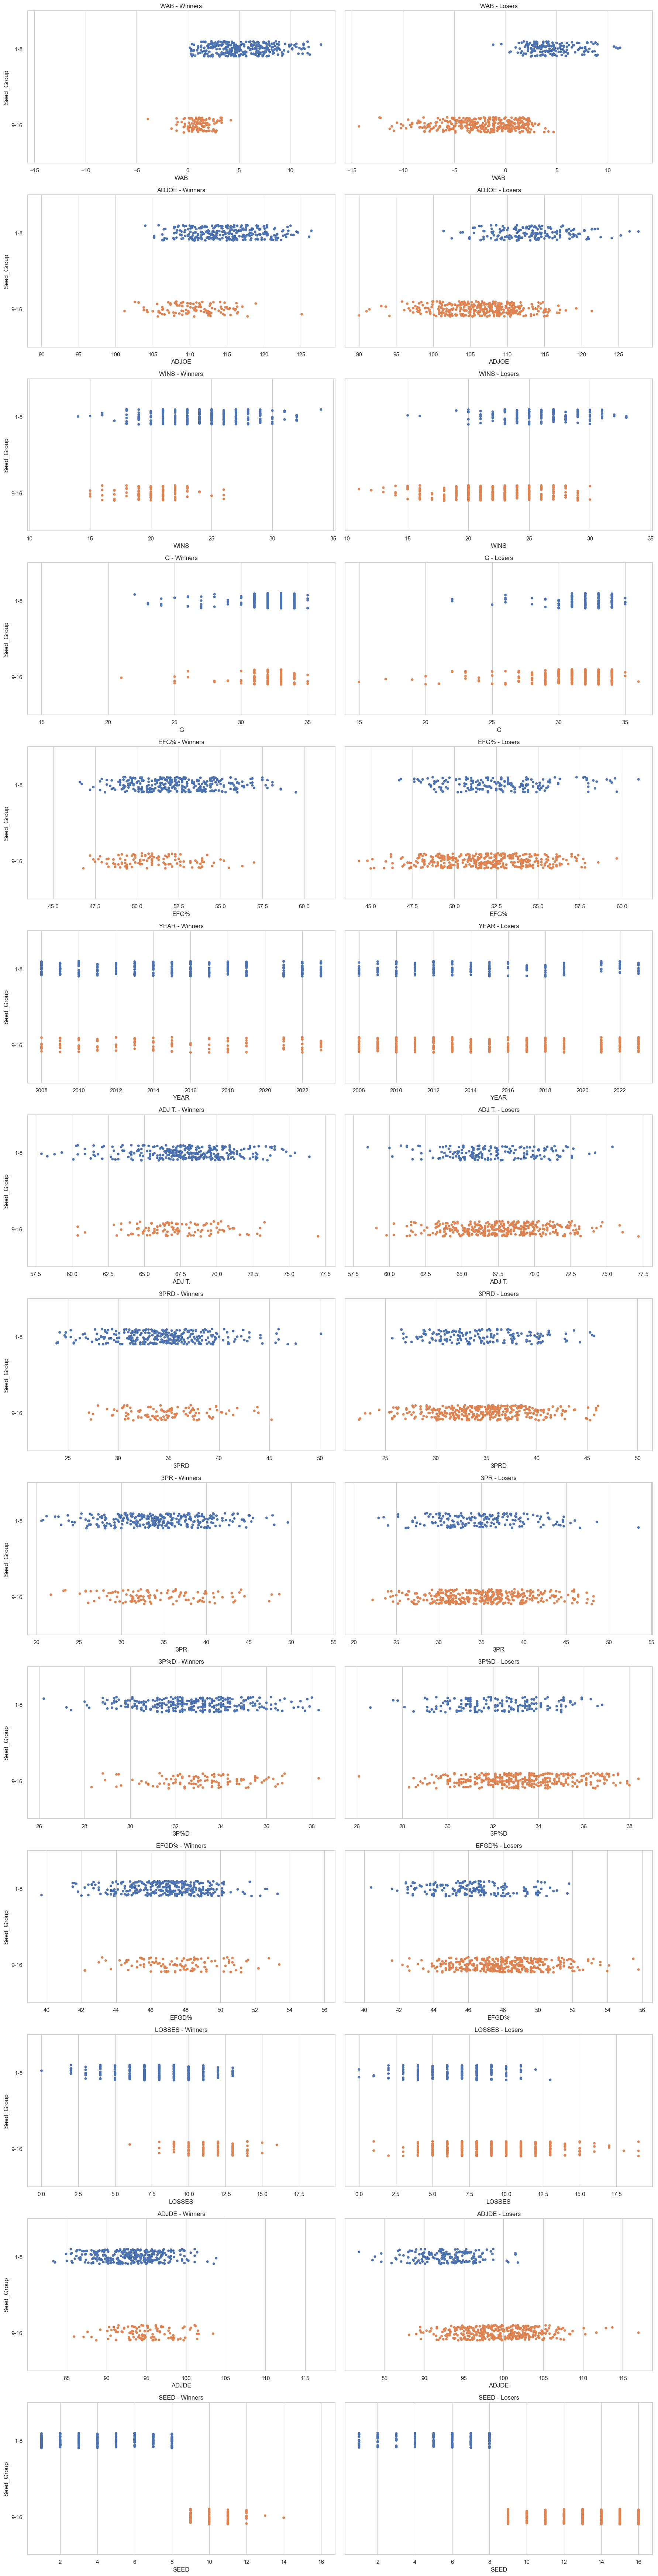

In [25]:
power_5['Is_32'] = power_5['Is_32'].astype(str)
nonpower_5['Is_32'] = nonpower_5['Is_32'].astype(str)

# classify seeds as 1-8 or 9-16
power_5['Seed_Group'] = power_5['SEED'].apply(lambda x: '1-8' if 1 <= x <= 8 else '9-16')
nonpower_5['Seed_Group'] = nonpower_5['SEED'].apply(lambda x: '1-8' if 1 <= x <= 8 else '9-16')

variables = ['WAB', 'ADJOE', 'WINS', 'G', 'EFG%', 'YEAR', 'ADJ T.', '3PRD', '3PR', '3P%D', 'EFGD%', 'LOSSES', 'ADJDE', 'SEED']

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=len(variables), ncols=2, figsize=(18, 70), sharey='row', sharex='row')

for i, variable in enumerate(variables):
    sns.stripplot(x=variable, y='Seed_Group', hue='Seed_Group', data=power_5, ax=axes[i, 0], jitter=True).set(title=f'{variable} - Winners')
    sns.stripplot(x=variable, y='Seed_Group', hue='Seed_Group', data=nonpower_5, ax=axes[i, 1], jitter=True).set(title=f'{variable} - Losers')

plt.tight_layout()
plt.show()
##shows different distributions for metrics based upon whether a team is a high seed or a low seed

/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3395107334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  power_5['Is_32'] = power_5['Is_32'].astype(str)
/var/folders/0w/g3wjj_rs5c50q2c5fmh30m200000gn/T/ipykernel_45778/3395107334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonpower_5['Is_32'] = nonpower_5['Is_32'].astype(str)


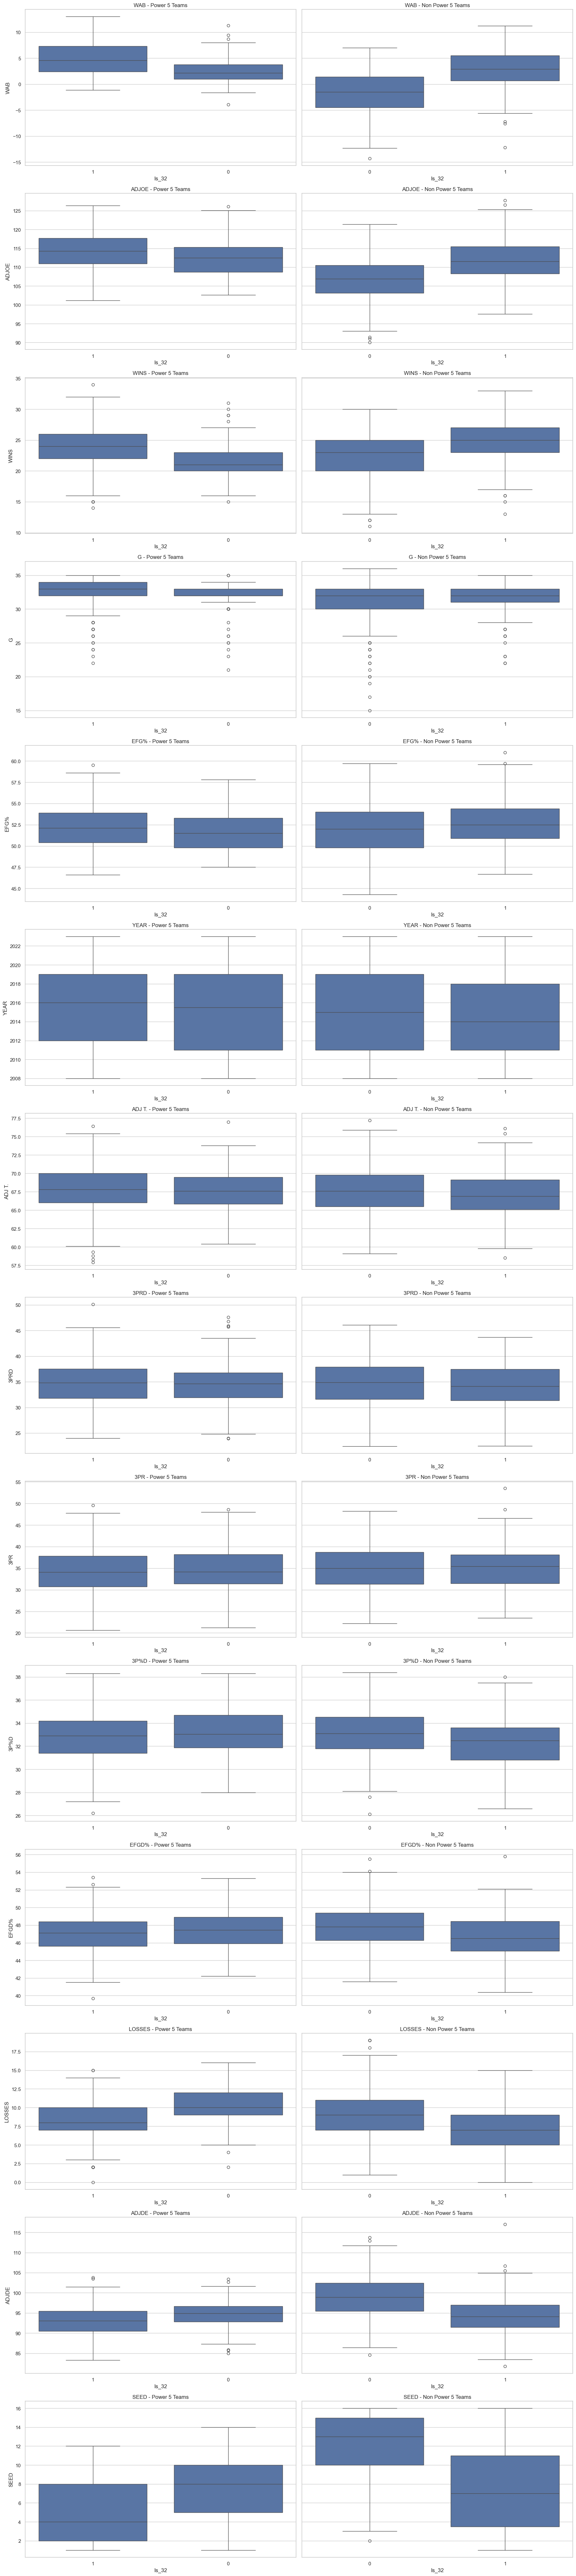

In [26]:
power_5['Is_32'] = power_5['Is_32'].astype(str)
nonpower_5['Is_32'] = nonpower_5['Is_32'].astype(str)

variables = ['WAB', 'ADJOE', 'WINS', 'G', 'EFG%', 'YEAR', 'ADJ T.', '3PRD', '3PR', '3P%D', 'EFGD%', 'LOSSES', 'ADJDE', 'SEED']

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=len(variables), ncols=2, figsize=(18, 80), sharey='row')

for i, variable in enumerate(variables):
    # Power 5 dataframe
    sns.boxplot(x='Is_32', y=variable, data=power_5, ax=axes[i, 0]).set(title=f'{variable} - Power 5 Teams')
    
    # Non Power 5 dataframe
    sns.boxplot(x='Is_32', y=variable, data=nonpower_5, ax=axes[i, 1]).set(title=f'{variable} - Non Power 5 Teams')

plt.tight_layout()
plt.show()

##I am attempting to find how power 5 first round winners and losers compare to one another vs how non power five 
#first round winners and losers compare to one another. the 0 on the x axis means 1st round loser, and the 1 means winner